In [12]:
import pandas as pd

In [146]:
df_foreign = pd.read_excel('foreign.xlsx')

In [147]:
df_foreign.head()

,Unnamed: 0,公司名称,注册地址-国家代码,全球行业分类标准（GICS）代码,最新的报表日期,报表模板（3类）,合并报表代码,总收入\n千 CNY\n最新可用年份,员工数量\n最新可用年份,ISIN索引号,公司简介,主营业务单元情况,主要经营活动,主要产品和服务,国内主要国家,国外主要国家或地区,公司成立日期
0,1.0,Walmart Inc.,US,30101040.0,2024-01-31,IND,C1,4653991335.29152,n.a.,US9311421039,This company is engaged in the operation of re...,Engaged in the operation of retail stores in v...,Retail,Retail stores in various formats,United States of America,NaN,1969-10-31 00:00:00
1,2.0,"Amazon.Com, Inc.",US,25503030.0,2023-12-31,IND,C1,4106034107.00828,1525000,US0231351067,"The company, based in the United States, opera...",Operates as an online retailer in North Americ...,Services,An online retailer in North America and intern...,United States of America,NaN,1996-05-28 00:00:00
2,3.0,Apple Inc.,US,45202030.0,2023-12-30,IND,C1,2799398644.0464,161000,US0378331005,"This company, formerly known as Apple Computer...","Engaged in the design, manufacture, and wholes...",Manufacturing; Wholesale,"Offers iPhone, a line of smartphones; iPad, a ...",United States of America,NaN,1977-01-03 00:00:00
3,4.0,CVS Health Corporation,US,35102015.0,2023-12-31,IND,C1,2555808621.77857,300000,US1266501006,The company is engaged in the provision of int...,Engaged in the provision of integrated pharmac...,Services,Integrated pharmacy services,United States of America,NaN,1996-08-22 00:00:00
4,5.0,Exxon Mobil Corp,US,10102010.0,2023-12-31,IND,C1,2390941478.14113,62000,US30231G1022,This company is engaged in the exploration and...,Engaged in the exploration and production of c...,Manufacturing,"Crude oil, natural gas and petroleum products;...",United States of America,NaN,05/08/1882


In [15]:
df_foreign.value_counts("注册地址-国家代码")

注册地址-国家代码
US    10003
GB     1664
SG      577
Name: count, dtype: int64

In [6]:
df_US = df_foreign[df_foreign['注册地址-国家代码']=='US']

In [10]:
df_US['公司成立日期'] = pd.to_datetime(df_US['公司成立日期'], errors='coerce')

<ipython-input-10-2c6731685469>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US['公司成立日期'] = pd.to_datetime(df_US['公司成立日期'], errors='coerce')


In [12]:
df_US['公司成立年份'] = df_US['公司成立日期'].dt.year

<ipython-input-12-27592a6fb1c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US['公司成立年份'] = df_US['公司成立日期'].dt.year


In [14]:
# 去除包含NaT的行
df_US.dropna(subset=['公司成立日期'], inplace=True)

<ipython-input-14-1a12ce990db1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US.dropna(subset=['公司成立日期'], inplace=True)


In [17]:
# 按照“公司成立日期”列对DataFrame进行排序
df_US.sort_values(by='公司成立日期', inplace=True)

<ipython-input-17-b4f562a8f6e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US.sort_values(by='公司成立日期', inplace=True)


In [25]:
df_US.to_csv("US.csv")

In [26]:
df_US = pd.read_csv("US.csv")

In [27]:
df_US

,Unnamed: 0.1,Unnamed: 0,公司名称,注册地址-国家代码,全球行业分类标准（GICS）代码,最新的报表日期,报表模板（3类）,合并报表代码,总收入\n千 CNY\n最新可用年份,员工数量\n最新可用年份,ISIN索引号,公司简介,主营业务单元情况,主要经营活动,主要产品和服务,国内主要国家,国外主要国家或地区,公司成立日期,公司成立年份
0,3977,3978.0,York Water Company (The),US,55104010.0,2023-12-31,IND,C1,507417.049253034,130,US9871841089,"The company is engaged in the impoundment, pur...","Engaged in the impoundment, purification and d...",Services,Water,United States of America,NaN,1816-08-02,1816.0
1,4228,4229.0,Pardee Resources Company,US,10102050.0,2023-09-30,IND,C1,372493.518345925,n.a.,US6994371093,This company is engaged in the provision of su...,Engaged in the provision of support activities...,Services,Provision of support activities for petroleum ...,United States of America,NaN,1840-01-01,1840.0
2,63,64.0,American Express Company,US,40202010.0,2023-12-31,BNK,C2,431509156.004132,74620,US0258161092,"The company is engaged as a global payments, n...","Engaged as a global payments, network, and tra...",Services,"Global payments, network, and travel services",United States of America,"Europe, Asia Pacific",1850-03-18,1850.0
3,3591,3592.0,Burke & Herbert Bank & Trust Company,US,40101015.0,2023-12-31,BNK,C1,797690.090310428,400,US1213311020,The company is a financial institution that fo...,Financial institution that focuses in the prov...,Services,Personal and commercial banking services,United States of America,NaN,1852-01-01,1852.0
4,5358,5359.0,THE First Citizens National Bank of Upper Sand...,US,40101015.0,2023-12-31,BNK,C1,99324.6139405919,72,US3195671033,This company is engaged in the operation of na...,Engaged in the operation of national chartered...,Services,"Checking, savings, money market, certificates ...",United States of America,NaN,1860-01-01,1860.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9798,9816,9817.0,Mymd Pharmaceuticals INC,US,35101010.0,2023-09-30,IND,C1,0,9,US62856X2018,This company is an American-based firm that de...,"Develops, manufactures, and supplies rapid, po...",Manufacturing,"Rapid, point of care screening and testing pro...",United States of America,NaN,2023-10-19,2023.0
9799,1139,1140.0,"Amneal Pharmaceuticals, Inc.",US,35202010.0,2023-12-31,IND,C1,17098970.8861118,7700,US03168L1052,This company operates as a specialty pharmaceu...,"Operates as a specialty pharmaceutical firm, d...",Manufacturing,Generic pharmaceutical products,United States of America,NaN,2023-10-23,2023.0
9800,7685,7686.0,"Save Foods, Inc.",US,15101030.0,2023-09-30,IND,C1,2752.48398777747,8,US80512Q4029,"This company, based in the United States of Am...","Engaged in the development, production and who...",Manufacturing; Wholesale,"CitrusGuard for the treatment of mandarins, or...",United States of America,NaN,2023-11-03,2023.0
9801,10534,10535.0,"Airship AI Holdings, Inc.",US,NaN,2023-09-30,IND,C1,0,n.a.,US0089401089,This company operates within the technology in...,Operates within the technology industry,Services,Ingesting data from edge-based sensors used by...,United States of America,NaN,2023-12-20,2023.0


In [16]:
import matplotlib.pyplot as plt

In [31]:
# 对“公司成立日期”进行计数
date_counts = df_US['公司成立年份'].value_counts().sort_index()

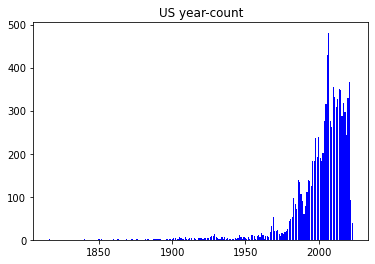

In [35]:
# 绘制柱状图
plt.bar(date_counts.index, date_counts.values,color = 'blue')
plt.title("US year-count")
plt.savefig("US year-count.png",transparent = True)
plt.show()

In [148]:
df_GB = df_foreign[df_foreign['注册地址-国家代码']=='GB']

In [149]:
df_GB['公司成立日期'] = pd.to_datetime(df_GB['公司成立日期'], errors='coerce')

<ipython-input-149-e689cdf2d826>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GB['公司成立日期'] = pd.to_datetime(df_GB['公司成立日期'], errors='coerce')


In [150]:
df_GB['公司成立年份'] = df_GB['公司成立日期'].dt.year

<ipython-input-150-861e4b8737f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GB['公司成立年份'] = df_GB['公司成立日期'].dt.year


In [151]:
# 去除包含NaT的行
df_GB.dropna(subset=['公司成立日期'], inplace=True)

<ipython-input-151-c829eb1c9a80>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GB.dropna(subset=['公司成立日期'], inplace=True)


In [152]:
# 按照“公司成立日期”列对DataFrame进行排序
df_GB.sort_values(by='公司成立日期', inplace=True)

<ipython-input-152-8e82efa0cdde>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GB.sort_values(by='公司成立日期', inplace=True)


In [153]:
# 对“公司成立日期”进行计数
date_counts = df_GB['公司成立年份'].value_counts().sort_index()

In [154]:
df_GB.to_csv("GB.csv")

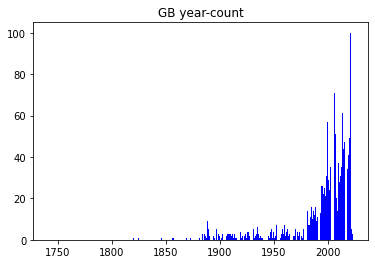

In [155]:
# 绘制柱状图
plt.bar(date_counts.index, date_counts.values,color = 'blue')
plt.title("GB year-count")      
plt.savefig("GB year-count.png",transparent = True)
plt.show()

In [156]:
df_SG = df_foreign[df_foreign['注册地址-国家代码']=='SG']

In [157]:
df_SG['公司成立日期'] = pd.to_datetime(df_SG['公司成立日期'], errors='coerce')

<ipython-input-157-4004d6af8eb4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SG['公司成立日期'] = pd.to_datetime(df_SG['公司成立日期'], errors='coerce')


In [158]:
df_SG['公司成立年份'] = df_SG['公司成立日期'].dt.year

<ipython-input-158-c7d38126eea2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SG['公司成立年份'] = df_SG['公司成立日期'].dt.year


In [159]:
# 去除包含NaT的行

df_SG.dropna(subset=['公司成立日期'], inplace=True)

<ipython-input-159-5d02a8643e85>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SG.dropna(subset=['公司成立日期'], inplace=True)


In [160]:

df_SG.sort_values(by='公司成立日期', inplace=True)

<ipython-input-160-b74e823dd368>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SG.sort_values(by='公司成立日期', inplace=True)


In [161]:

date_counts = df_SG['公司成立年份'].value_counts().sort_index()

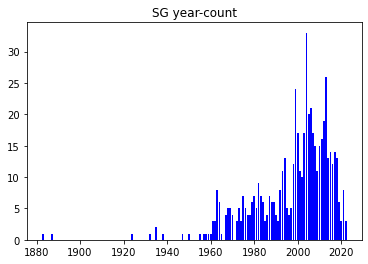

In [162]:
# 绘制柱状图

plt.bar(date_counts.index, date_counts.values,color = 'blue')
plt.title("SG year-count")
plt.savefig("SG year-count.png",transparent = True)
plt.show()

In [82]:
baseline_words = ["Big Data Related Field"]

In [3]:
import pandas as pd

/Users/xrz/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [14]:
df_US = pd.read_csv("US.csv")

In [15]:
df_US_1990 = df_US[df_US['公司成立年份']==1990]

In [12]:
df_US_1990

,Unnamed: 0.1,Unnamed: 0,公司名称,注册地址-国家代码,全球行业分类标准（GICS）代码,最新的报表日期,报表模板（3类）,合并报表代码,总收入\n千 CNY\n最新可用年份,员工数量\n最新可用年份,ISIN索引号,公司简介,主营业务单元情况,主要经营活动,主要产品和服务,国内主要国家,国外主要国家或地区,公司成立日期,公司成立年份
1508,11399,11400.0,"Mexico Equity and Income Fund, Inc., THE",US,40201040.0,2023-07-31,IND,C1,n.a.,n.a.,US5928341057,This fund is engaged in investmenting in secur...,Engaged in investmenting in securities,Services,Investmenting in securities,United States of America,NaN,1990-01-01,1990.0
1509,10289,10290.0,"Supurva Healthcare Group, Inc.",US,NaN,2023-09-30,IND,C1,0,n.a.,US8686481065,This company operates as a healthcare company....,Operates as a healthcare company,Services,"Dentistry, podiatry, optometry, and wound care...",United States of America,NaN,1990-01-01,1990.0
1510,1781,1782.0,"Home Bancshares, Inc.",US,40101015.0,2023-12-31,BNK,C1,7082879.36723941,2819,US4368932004,It is a holding company primarily engaged in t...,Holding company primarily engaged in the manag...,Services,Management and administration of its subsidiar...,United States of America,NaN,1990-01-02,1990.0
1511,10017,10018.0,"NEW Germany Fund, Inc. (The)",US,40201040.0,2010-12-31,IND,C1,0,n.a.,US6444651060,This company is engaged in non-diversified clo...,Engaged in non-diversified closed-end manageme...,Services,Non-diversified closed-end management investments,United States of America,NaN,1990-01-16,1990.0
1512,5052,5053.0,"QRS Music Technologies, Inc.",US,25202010.0,2007-03-31,IND,C1,144607.666929908,60,US74726W1071,"The company specializes in the manufacture, sa...","Specializes in the manufacture, sale and distr...",Manufacturing,"Pianos and piano accessories, Pianomation musi...",United States of America,Australia; Hong Kong; Europe,1990-01-16,1990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1564,11111,11112.0,"Pacific Vegas Global Strategies, Inc.",US,NaN,2022-03-31,IND,C1,0,n.a.,US6950361039,This company is engaged in the conducting of t...,Engaged in the conducting of telecommunication...,Services,Involved in conducting an offshore business of...,United States of America,NaN,1990-12-19,1990.0
1565,9898,9899.0,Nuveen Pennsylvania Quality Municipal Income Fund,US,40201040.0,2011-04-30,IND,C1,0,n.a.,US6709721087,The company operates as a closed-end managemen...,Operates as a closed-end management investment...,Services,Closed-end management investment,United States of America,NaN,1990-12-19,1990.0
1566,93,94.0,"Goldman Sachs Group, INC",US,40203020.0,2023-12-31,BNK,C2,330584375.670941,45300,US38141G1040,This company has its registered office address...,Engaged in the provision of a wide range of fi...,Services,Investment banking (financing and mergers and ...,United States of America,NaN,1990-12-31,1990.0
1567,3543,3544.0,"Guaranty Bancshares, Inc.",US,40101015.0,2023-12-31,BNK,C1,853610.190851779,488,US4007641065,The entity is a bank holding company for subsi...,Bank holding company for subsidiaries engaged ...,Services,Exercises financial control over its subsidiar...,United States of America,NaN,1990-12-31,1990.0


In [7]:
import scipy
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

In [65]:
df_US_2020 = df_US[df_US['公司成立年份']==2020]

In [66]:
df_US_2020

,Unnamed: 0.1,Unnamed: 0,公司名称,注册地址-国家代码,全球行业分类标准（GICS）代码,最新的报表日期,报表模板（3类）,合并报表代码,总收入\n千 CNY\n最新可用年份,员工数量\n最新可用年份,ISIN索引号,公司简介,主营业务单元情况,主要经营活动,主要产品和服务,国内主要国家,国外主要国家或地区,公司成立日期,公司成立年份
8975,8914,8915.0,Invesco Bulletshares 2028 High Yield Corporate...,US,NaN,2023-08-31,IND,C1,160.377795921063,n.a.,US46138J4528,This company operates as an investment firm. I...,An exchange-traded index fund or Index ETF,Services,Invests at least 80 percent of its total asset...,United States of America,NaN,2020-01-01,2020.0
8976,12160,12161.0,Emles Federal Contractors ETF,US,NaN,2022-06-30,IND,C1,n.a.,n.a.,US2913618714,This company is engaged in the management of i...,Engaged in the management of invesment funds,Services,"Seeks investment results that correspond, befo...",United States of America,NaN,2020-01-01,2020.0
8977,9323,9324.0,Ishares ESG Advanced Msci EM ETF,US,NaN,2023-08-31,IND,C1,21.8696994437813,n.a.,US46436E7426,This company operates as an exchange-traded fu...,Operates as an exchange-traded fund incorporat...,Services,Exchange-traded fund,United States of America,NaN,2020-01-01,2020.0
8978,9322,9323.0,Ishares ESG Msci EM Leaders ETF,US,NaN,2023-08-31,IND,C1,21.8696994437813,n.a.,US46436E6014,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01,2020.0
8979,9226,9227.0,Cornercap Fundametrics Large-Cap ETF,US,NaN,2023-09-30,IND,C1,48.07949949885,n.a.,US89832P2671,This company is engaged in the provision of ot...,Engaged in the provision of other financial in...,Services,"Specialises in providing investment, share exc...",United States of America,NaN,2020-01-01,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9299,3301,3302.0,Global Crossing Airlines Group Inc.,US,15104020.0,2023-12-31,IND,C1,1143844.15641735,625,US37960G4010,This company operates as video game store. It ...,Operates as video game store,Wholesale; Retail,"Pool tables, dart boards with casual and tourn...",United States of America,NaN,2020-12-22,2020.0
9300,5822,5823.0,Icoreconnect INC,US,35103010.0,2023-09-30,IND,C1,55803.4691522021,41,US4509581033,This company operates as a newly organized bla...,Operates as a newly organized blank check comp...,Services,A newly organized blank check company formed a...,United States of America,NaN,2020-12-23,2020.0
9301,2149,2150.0,Core Scientific INC,US,45102030.0,2023-09-30,IND,C1,4473226.59813643,235,US21874A1060,This company operates as a blank check company...,Operates as a blank check company,Services,Blank check company,United States of America,NaN,2020-12-29,2020.0
9302,10486,10487.0,"Terns Pharmaceuticals, Inc.",US,35202010.0,2023-12-31,IND,C1,0,66,US8808811074,This company is engaged in pharmaceutical prep...,Engaged in pharmaceutical preparations,Manufacturing,Development of a portfolio of small-molecule s...,United States of America,NaN,2020-12-29,2020.0


In [41]:
df_US_1980 = df_US[df_US['公司成立年份']==1980]

In [ ]:
list(df_US_1990['Average Similarity'])

In [71]:
df_CN = pd.read_excel("3.xlsx")

In [83]:
df_CN = df_CN[df_CN['注册地址-国家代码']=='CN']

<ipython-input-84-205e53f7d168>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN['公司成立日期'] = pd.to_datetime(df_CN['公司成立日期'], errors='coerce')
<ipython-input-84-205e53f7d168>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN['公司成立年份'] = df_CN['公司成立日期'].dt.year
<ipython-input-84-205e53f7d168>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

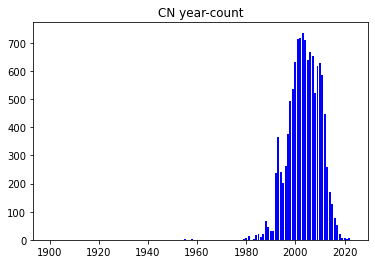

In [84]:
df_CN['公司成立日期'] = pd.to_datetime(df_CN['公司成立日期'], errors='coerce')
df_CN['公司成立年份'] = df_CN['公司成立日期'].dt.year
df_CN.dropna(subset=['公司成立日期'], inplace=True)
df_CN.sort_values(by='公司成立日期', inplace=True)
date_counts = df_CN['公司成立年份'].value_counts().sort_index()

plt.bar(date_counts.index, date_counts.values,color = 'blue')
plt.title("CN year-count")
plt.savefig("CN year-count.png",transparent = True)
plt.show()

In [94]:
df_CN_2019 = df_CN[df_CN['公司成立年份']==2019]

In [95]:
df_CN_2019

,Unnamed: 0,公司名称,注册地址-国家代码,全球行业分类标准（GICS）代码,最新的报表日期,报表模板（3类）,合并报表代码,总收入\n千 CNY\n最新可用年份,员工数量\n最新可用年份,ISIN索引号,公司简介,主营业务单元情况,主要经营活动,主要产品和服务,国内主要国家,国外主要国家或地区,公司成立日期,公司成立年份
13175,13176.0,"Jiangxi Geruling Technology Co., Ltd.",CN,NaN,2022-12-31,IND,C1,127500,n.a.,NaN,This company is engaged in providing virtual r...,Engaged in providing virtual reality software ...,Services,Virtual reality software related product servi...,China,NaN,2019-01-01,2019
2361,2362.0,"Hangzhou SF Intra-City Industrial Co., Ltd.",CN,20301010.0,2023-06-30,IND,C1,10316142,2178,CNE100004SP7,This company is engaged in the provision of ex...,Engaged in the provision of express courier se...,Services,"International express services, including door...",China,NaN,2019-01-01,2019
7898,7899.0,"Zhongguancun Science-Tech Leasing Co., Ltd.",CN,40201040.0,2023-06-30,IND,C1,753201,132,CNE100003Q08,This company is engaged in providing investmen...,Engaged in providing investment advise and fin...,Services,Investment advise and financial services,China,NaN,2019-01-01,2019
14624,14625.0,Jiangsu Xinshengteng Technology Development Co...,CN,NaN,2023-03-31,IND,C1,79746,n.a.,NaN,This company is engaged leasing and rental ser...,Engaged leasing and rental services,Services,"Renting a range of consumer, commercial, and i...",China,NaN,2019-01-01,2019
11187,11188.0,"Zhiyu Zhilian Technology Co., Ltd.",CN,NaN,2023-06-30,IND,C1,238938,141,NaN,This company is engaged in the provision of co...,Engaged in the provision of computer systems d...,Services,Computer systems design and related services (...,China,NaN,2019-01-01,2019
2892,2893.0,Guoquan Food (Shanghai) CO. LTD,CN,30101030.0,2023-04-30,IND,C1,7210256,n.a.,CNE1000068W1,This institution is engaged in providing indiv...,Engaged in providing individual and family ser...,Services,Individual and family services,China,NaN,2019-01-01,2019
4208,4209.0,"Xinjiang Taikun Protein Technology Co., LTD",CN,NaN,2023-09-30,IND,C1,3540235,n.a.,NaN,This company operates in agricultural processi...,Operates in agricultural processing and agro-p...,Manufacturing,"Advanced processing of cotton seed products, m...",China,NaN,2019-01-01,2019
12132,12133.0,"Tongwei Xinda Technology (Jiangsu) Co., Ltd.",CN,NaN,2023-03-31,IND,C1,176083,n.a.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01,2019


tensor(0.1345)
tensor(0.1466)
tensor(0.1829)
tensor(0.1175)
tensor(0.3135)
tensor(0.1256)
tensor(0.1090)
error


<ipython-input-96-b0aeb11b8161>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_2019['Average Similarity'] = df_CN_2019['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


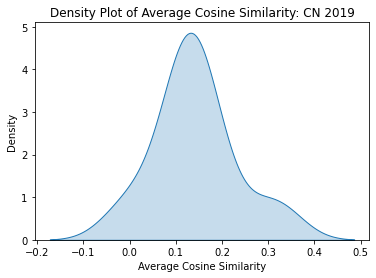

In [96]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt


# 计算余弦相似度的平均值
def average_cosine_similarity(text, baseline_words):
    try:
        text_embed = model.encode(text)
        similarities = []
        for word in baseline_words:
            word_embed = model.encode(word)
            similarity = util.pytorch_cos_sim(text_embed,word_embed)[0][0]
            similarities.append(similarity)
        print(sum(similarities) / len(similarities))
        return sum(similarities) / len(similarities)
    except:
        print("error")
        return 0

# 应用函数并计算平均相似度
df_CN_2019['Average Similarity'] = df_CN_2019['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))

# 绘制密度图
sns.kdeplot([float(item) for item in list(df_CN_2019['Average Similarity'])], fill=True)
plt.title('Density Plot of Average Cosine Similarity: CN 2019')
plt.xlabel('Average Cosine Similarity')
plt.ylabel('Density')
plt.savefig('Density_CN_2019.png',transparent = True)
plt.show()


In [97]:
df_CN_1990 = df_CN[df_CN['公司成立年份']==1990]

In [98]:
df_CN_1990

,Unnamed: 0,公司名称,注册地址-国家代码,全球行业分类标准（GICS）代码,最新的报表日期,报表模板（3类）,合并报表代码,总收入\n千 CNY\n最新可用年份,员工数量\n最新可用年份,ISIN索引号,公司简介,主营业务单元情况,主要经营活动,主要产品和服务,国内主要国家,国外主要国家或地区,公司成立日期,公司成立年份
6376,6377.0,"Nanjing Securities Co.,Ltd.",CN,40203020.0,2023-09-30,IND,C1,1363151,2168,CNE1000031R9,This company is engaged in the provision of se...,Engaged in the provision of security and commo...,Services,Caters investment services such as portfolio m...,China,NaN,1990-01-01,1990
5306,5307.0,"Jinhe Biotechnology Co., Ltd.",CN,35202010.0,2023-09-30,IND,C1,2125372,2292,CNE100001HK7,The company is primarily engaged in the manufa...,Engaged in the manufacture of food and feed ad...,Manufacturing,Food and feed additives,China,NaN,1990-01-01,1990
5370,5371.0,"Yangzhou Shuguang Cable Co.,Ltd.",CN,NaN,2023-06-30,IND,C1,2073015,648,NaN,This company is engaged in the manufacture and...,Engaged in the manufacture and sale of wire an...,Manufacturing,Wire and cable products,China,NaN,1990-01-01,1990
5423,5424.0,"Square Technology Group Co.,Ltd.",CN,20106020.0,2023-09-30,IND,C1,2021516,1430,CNE100002BB7,This company is engaged in the production and ...,Engaged in the production and distribution of ...,Manufacturing,Gearwheels and driving components,China,NaN,1990-01-01,1990
3582,3583.0,"Guangzhou Grandbuy Co.,Ltd.",CN,25503030.0,2023-09-30,IND,C1,4808003,3593,CNE100000841,The company operates as a general merchandise ...,Operates as a general merchandise retailer,Retail,"Operates department stores, which deal with ge...",China,NaN,1990-01-01,1990
2319,2320.0,Beijing Urban Construction Design & Developmen...,CN,20103010.0,2023-06-30,IND,C1,10666311,4946,CNE100001SV1,This company operates as a scientific and tech...,Operates as a scientific and technological eng...,Services,"Construction services; Consulting, planning, i...",China,NaN,1990-01-01,1990
12562,12563.0,Hubei Boshlong Technology Corporation,CN,NaN,2022-12-31,IND,C1,153016,n.a.,NaN,This firm is an industrial company engaged in ...,Engaged in the manufacture and marketing of a ...,Manufacturing,"Bolts, nuts, screws, rivets, washers, and othe...",China,NaN,1990-01-01,1990
8787,8788.0,"Jiangsu Nanfang Medical Co.,Ltd.",CN,35101020.0,2023-09-30,IND,C1,541955,1002,CNE100002WH0,This company is an entity based in China that ...,Engaged in the wholesale distribution of medic...,Wholesale,Medicinal herbs and prepared Chinese medicines,China,NaN,1990-01-01,1990
9755,9756.0,"Changzhou Star SEA Electronics Co.,Ltd",CN,NaN,2023-06-30,IND,C1,390318,461,NaN,This company is engaged in diode production. I...,Engaged in diode production,Manufacturing,Diode production,China,NaN,1990-01-01,1990
4379,4380.0,"Suzhou Good-Ark Electronics Co., Ltd.",CN,45301020.0,2023-09-30,IND,C1,3268297,1944,CNE000001P60,This company is engaged in the manufacture of ...,Engaged in the manufacture of electronic produ...,Manufacturing,"Semi-conductor chips, diodes and triodes; Diod...",China,NaN,1990-01-01,1990


tensor(0.1632)
tensor(0.1129)
tensor(0.0719)
tensor(-0.0105)
tensor(0.1221)
tensor(0.2704)
tensor(0.0192)
tensor(-0.0167)
tensor(0.0667)
tensor(0.0424)
tensor(0.1184)
tensor(0.0435)
tensor(0.2122)
tensor(0.1462)
tensor(0.1049)
tensor(0.0984)
tensor(0.1061)
tensor(0.1366)
tensor(-0.1144)
tensor(0.0303)
tensor(-0.0369)
tensor(0.2870)
tensor(0.1579)
tensor(0.2047)
tensor(0.2006)
tensor(0.1834)
tensor(0.2584)
tensor(0.0566)
tensor(0.0085)
tensor(0.0459)
tensor(0.2272)
tensor(-0.0684)


<ipython-input-99-d288f58e04a8>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_1990['Average Similarity'] = df_CN_1990['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


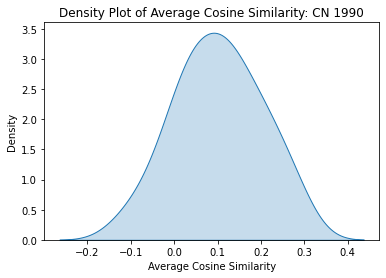

In [99]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt


# 计算余弦相似度的平均值
def average_cosine_similarity(text, baseline_words):
    try:
        text_embed = model.encode(text)
        similarities = []
        for word in baseline_words:
            word_embed = model.encode(word)
            similarity = util.pytorch_cos_sim(text_embed,word_embed)[0][0]
            similarities.append(similarity)
        print(sum(similarities) / len(similarities))
        return sum(similarities) / len(similarities)
    except:
        print("error")
        return 0

# 应用函数并计算平均相似度
df_CN_1990['Average Similarity'] = df_CN_1990['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))

# 绘制密度图
sns.kdeplot([float(item) for item in list(df_CN_1990['Average Similarity'])], fill=True)
plt.title('Density Plot of Average Cosine Similarity: CN 1990')
plt.xlabel('Average Cosine Similarity')
plt.ylabel('Density')
plt.savefig('Density_CN_1990.png',transparent = True)
plt.show()


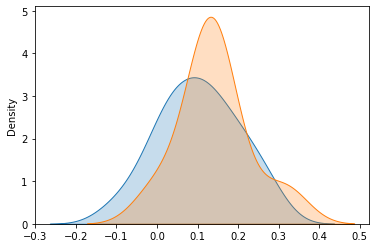

In [101]:
sns.kdeplot([float(item) for item in list(df_CN_1990['Average Similarity'])], fill=True)
sns.kdeplot([float(item) for item in list(df_CN_2019['Average Similarity'])], fill=True)
plt.savefig("CN 2019 vs 1990.png",transparent = True)

In [106]:
data = []
for year in range(1990,2020):
    df_CN_year = df_CN[df_CN['公司成立年份']==year]
    df_CN_year['Average Similarity'] = df_CN_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))
    data.append([float(item) for item in list(df_CN_year['Average Similarity'])])


tensor(0.1632)
tensor(0.1129)
tensor(0.0719)
tensor(-0.0105)
tensor(0.1221)
tensor(0.2704)
tensor(0.0192)
tensor(-0.0167)
tensor(0.0667)
tensor(0.0424)
tensor(0.1184)
tensor(0.0435)
tensor(0.2122)
tensor(0.1462)
tensor(0.1049)
tensor(0.0984)
tensor(0.1061)
tensor(0.1366)
tensor(-0.1144)
tensor(0.0303)
tensor(-0.0369)
tensor(0.2870)
tensor(0.1579)
tensor(0.2047)
tensor(0.2006)
tensor(0.1834)
tensor(0.2584)
tensor(0.0566)
tensor(0.0085)
tensor(0.0459)
tensor(0.2272)
tensor(-0.0684)


<ipython-input-106-b851c0324a67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_year['Average Similarity'] = df_CN_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.0174)
tensor(0.1045)
tensor(0.0024)
tensor(0.1547)
tensor(0.2790)
tensor(-0.1630)
tensor(0.0906)
tensor(0.1355)
tensor(0.0181)
tensor(-0.0231)
tensor(0.0843)
tensor(0.0029)
tensor(-0.0487)
tensor(0.2117)
tensor(-0.0080)
tensor(-0.0234)
tensor(0.2031)
tensor(0.0854)
tensor(0.0938)
tensor(0.0378)
tensor(-0.0501)
tensor(-0.0835)
tensor(0.1339)
tensor(-0.0691)
tensor(-0.0359)
tensor(0.1991)
tensor(0.2629)
tensor(0.3003)
tensor(0.1492)
tensor(0.2158)
tensor(0.2981)
tensor(0.2845)
tensor(0.0744)
tensor(0.2079)
tensor(-0.0107)
tensor(-0.0093)


<ipython-input-106-b851c0324a67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_year['Average Similarity'] = df_CN_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1736)
tensor(0.2106)
tensor(0.2437)
tensor(0.2862)
tensor(0.0119)
tensor(-0.0601)
tensor(0.0282)
tensor(0.1059)
tensor(0.0411)
tensor(-0.0282)
tensor(0.0512)
tensor(0.1039)
tensor(-0.1756)
tensor(0.3092)
tensor(0.0843)
tensor(0.1289)
tensor(0.3369)
tensor(0.1780)
tensor(0.2145)
tensor(-0.0453)
tensor(-0.0601)
tensor(0.3085)
tensor(0.1181)
tensor(0.1597)
tensor(0.0126)
tensor(0.0154)
tensor(0.0654)
tensor(-0.0067)
tensor(-0.0330)
tensor(0.0623)
tensor(0.2117)
tensor(0.0304)
tensor(0.1468)
tensor(0.1360)
tensor(0.0752)
tensor(0.0961)
tensor(0.2516)
tensor(0.1284)
tensor(0.0303)
tensor(0.0880)
tensor(0.1544)
tensor(0.0761)
tensor(0.0888)
tensor(0.3001)
tensor(0.3010)
tensor(-0.0180)
tensor(0.1784)
tensor(-0.0576)
tensor(0.4209)
tensor(0.0613)
tensor(0.0804)
tensor(-0.0253)
tensor(0.0473)
tensor(0.0198)
tensor(0.0983)
tensor(0.0760)
tensor(-0.0386)
tensor(0.0032)
tensor(0.2325)
tensor(-0.0462)
tensor(0.1045)
tensor(0.1724)
tensor(0.2072)
tensor(0.0447)
tensor(0.2644)
tensor(-0.009

<ipython-input-106-b851c0324a67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_year['Average Similarity'] = df_CN_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.0921)
tensor(0.1208)
tensor(0.2407)
tensor(0.3244)
tensor(0.0026)
tensor(0.0389)
tensor(-0.0125)
tensor(0.0763)
tensor(0.1859)
tensor(0.0865)
tensor(0.2583)
tensor(0.1740)
tensor(0.1826)
tensor(-0.0419)
tensor(0.0908)
tensor(0.1257)
tensor(0.0967)
tensor(-0.0710)
tensor(0.1710)
tensor(0.1753)
tensor(0.0825)
tensor(0.0064)
tensor(0.0021)
tensor(0.2063)
tensor(-0.0676)
tensor(0.1579)
tensor(0.1263)
tensor(0.1974)
tensor(0.1048)
tensor(0.2271)
tensor(0.1936)
tensor(0.1620)
tensor(0.3214)
tensor(0.2531)
tensor(-0.0285)
tensor(0.4602)
tensor(0.0302)
tensor(0.0156)
tensor(0.2139)
tensor(-0.0158)
tensor(0.0513)
tensor(0.1877)
tensor(0.2430)
tensor(0.0422)
tensor(0.0615)
tensor(0.1335)
tensor(-0.0167)
tensor(0.0903)
tensor(0.0667)
tensor(0.0666)
tensor(0.2061)
tensor(0.0465)
tensor(0.1892)
tensor(0.1066)
tensor(-0.1025)
tensor(0.0061)
tensor(0.0391)
tensor(0.1453)
tensor(-0.0722)
tensor(0.1254)
tensor(0.0523)
tensor(0.1101)
tensor(0.2670)
tensor(-0.0368)
tensor(0.0638)
tensor(0.1619)


<ipython-input-106-b851c0324a67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_year['Average Similarity'] = df_CN_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.0214)
tensor(-0.0647)
tensor(-0.0224)
tensor(0.2290)
tensor(0.0843)
tensor(0.1986)
tensor(0.1107)
tensor(-0.1142)
tensor(0.1896)
tensor(0.3283)
tensor(0.0719)
tensor(0.0382)
tensor(-0.0770)
tensor(-0.0103)
tensor(0.0819)
tensor(0.1415)
tensor(0.0740)
tensor(-0.0611)
tensor(0.0031)
tensor(0.1629)
tensor(0.0983)
tensor(-0.0109)
tensor(0.0719)
tensor(0.0277)
tensor(0.2576)
tensor(0.1981)
tensor(0.0218)
tensor(0.1506)
tensor(0.1326)
tensor(-0.0078)
tensor(0.1855)
tensor(-0.0119)
tensor(-0.1879)
tensor(0.0028)
tensor(0.0944)
tensor(0.1196)
tensor(-0.0247)
tensor(0.1746)
tensor(0.0615)
tensor(0.0139)
tensor(0.0787)
tensor(0.1482)
tensor(0.2375)
tensor(0.2214)
tensor(0.1529)
tensor(0.0610)
tensor(0.1889)
tensor(0.3805)
tensor(0.0556)
tensor(0.0907)
tensor(0.1144)
tensor(-0.0107)
tensor(0.1448)
tensor(0.0583)
tensor(0.1409)
tensor(-0.0742)
tensor(0.1713)
tensor(0.1159)
tensor(0.1880)
tensor(0.1585)
tensor(0.1759)
tensor(0.1383)
tensor(0.1035)
tensor(0.5362)
tensor(-0.0518)
tensor(0.28

<ipython-input-106-b851c0324a67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_year['Average Similarity'] = df_CN_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(-0.0487)
tensor(0.0451)
tensor(0.2924)
tensor(0.1234)
tensor(0.0738)
tensor(-0.0737)
tensor(0.0706)
tensor(0.0137)
tensor(0.1920)
tensor(0.1730)
tensor(0.0893)
tensor(0.2135)
tensor(0.0761)
tensor(0.1988)
tensor(0.0889)
tensor(-0.0939)
tensor(0.1622)
tensor(-0.0093)
tensor(-0.0145)
tensor(0.1378)
tensor(0.2821)
tensor(0.0150)
tensor(0.0391)
tensor(0.0044)
tensor(0.1539)
tensor(0.0038)
tensor(0.1207)
tensor(0.1982)
tensor(-0.0695)
tensor(0.0060)
tensor(0.1388)
tensor(0.1606)
tensor(-7.6105e-05)
tensor(0.3010)
tensor(0.0176)
tensor(0.4209)
tensor(0.0596)
tensor(0.0369)
tensor(0.0433)
tensor(0.1644)
tensor(0.4602)
tensor(0.0480)
tensor(0.0483)
tensor(0.4354)
tensor(0.2136)
tensor(0.2265)
tensor(0.2870)
tensor(0.0569)
tensor(0.1609)
tensor(-0.0254)
tensor(-0.1331)
tensor(0.2051)
tensor(0.2085)
tensor(0.1690)
tensor(-0.0201)
tensor(0.1426)
tensor(0.0454)
tensor(0.2091)
tensor(0.2944)
tensor(0.1726)
tensor(0.1406)
tensor(-0.0503)
tensor(-0.0247)
tensor(0.0527)
tensor(0.1996)
tensor(0.

<ipython-input-106-b851c0324a67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_year['Average Similarity'] = df_CN_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.0570)
tensor(0.1343)
tensor(0.0974)
tensor(0.1129)
error
tensor(0.1852)
tensor(-0.0189)
tensor(0.0360)
tensor(0.1745)
error
tensor(0.1035)
tensor(0.0886)
tensor(0.4197)
tensor(0.0500)
tensor(0.2452)
tensor(0.0357)
tensor(0.1179)
tensor(0.1727)
tensor(0.1447)
error
tensor(0.0451)
tensor(0.2065)
tensor(0.0970)
tensor(0.1675)
tensor(0.1256)
tensor(0.2219)
tensor(0.0876)
tensor(0.1038)
tensor(0.2419)
tensor(-0.0082)
tensor(0.0625)
tensor(0.1429)
tensor(0.0889)
tensor(0.0057)
tensor(0.2320)
tensor(0.2645)
tensor(0.0066)
tensor(0.2693)
tensor(-0.1198)
tensor(-0.0939)
tensor(-0.0067)
tensor(-0.0093)
tensor(0.1860)
tensor(-0.0698)
tensor(0.0718)
tensor(0.1987)
tensor(0.2944)
tensor(0.1936)
tensor(-0.0428)
error
tensor(-0.0231)
tensor(-0.0717)
tensor(0.1268)
tensor(0.1202)
tensor(0.1983)
tensor(-0.1404)
tensor(0.2187)
tensor(0.1343)
tensor(0.0912)
tensor(0.1942)
tensor(0.0323)
tensor(0.0861)
tensor(0.0627)
tensor(0.1109)
tensor(0.0433)
tensor(-0.0204)
tensor(0.0937)
tensor(-0.0310)
ten

<ipython-input-106-b851c0324a67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_year['Average Similarity'] = df_CN_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1854)
tensor(0.0123)
tensor(0.3944)
tensor(-0.0755)
tensor(0.1182)
tensor(0.2264)
tensor(-0.0409)
tensor(0.3115)
tensor(0.0465)
tensor(0.1620)
tensor(0.0149)
tensor(0.0843)
tensor(0.2501)
tensor(0.1894)
tensor(0.0320)
tensor(0.4209)
tensor(0.0752)
tensor(-0.0690)
tensor(-0.0462)
tensor(0.1018)
tensor(-0.0475)
tensor(0.0191)
tensor(0.1467)
tensor(0.1647)
tensor(-0.0602)
tensor(0.1429)
tensor(0.0129)
tensor(-0.0339)
tensor(0.0728)
tensor(0.1826)
tensor(0.0358)
tensor(0.1963)
tensor(0.1540)
tensor(-0.0793)
tensor(0.3037)
tensor(0.2268)
tensor(0.0021)
tensor(0.2420)
tensor(0.1412)
tensor(0.0129)
tensor(0.0214)
tensor(0.1574)
tensor(0.1980)
tensor(0.0556)
tensor(0.0207)
tensor(0.0312)
tensor(0.0063)
tensor(0.2328)
tensor(-0.0063)
tensor(0.1556)
tensor(-0.0931)
tensor(0.0645)
tensor(0.0863)
tensor(-0.0329)
tensor(0.2065)
tensor(0.2256)
tensor(0.0037)
tensor(0.3482)
tensor(0.2022)
tensor(0.2260)
tensor(0.1357)
tensor(0.0507)
tensor(-0.0215)
tensor(0.2094)
tensor(0.2445)
tensor(0.1848

<ipython-input-106-b851c0324a67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_year['Average Similarity'] = df_CN_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1536)
tensor(0.0789)
tensor(0.1770)
tensor(0.1420)
tensor(0.0716)
tensor(0.0150)
tensor(0.4354)
tensor(-0.0910)
tensor(0.0432)
tensor(-0.0462)
tensor(0.2254)
tensor(0.2411)
tensor(-0.0048)
tensor(0.3585)
tensor(0.0602)
tensor(-0.0355)
tensor(-0.0231)
tensor(0.2647)
tensor(-0.0151)
tensor(0.0015)
tensor(0.0753)
tensor(0.1134)
tensor(-0.0938)
tensor(0.2396)
tensor(-0.0066)
tensor(0.0836)
tensor(0.0115)
tensor(-0.0121)
tensor(0.1892)
tensor(0.0691)
tensor(0.3460)
tensor(0.0145)
tensor(0.2446)
tensor(0.2380)
tensor(0.1834)
tensor(0.0082)
tensor(0.2565)
tensor(-0.0379)
tensor(0.3146)
tensor(0.0575)
tensor(0.0610)
tensor(0.1080)
tensor(0.1807)
tensor(0.0738)
tensor(0.1344)
tensor(0.1576)
tensor(0.1995)
tensor(-0.0793)
tensor(0.2050)
tensor(0.2563)
tensor(0.2033)
tensor(0.3232)
tensor(0.1414)
tensor(0.0214)
tensor(0.0339)
tensor(0.1174)
tensor(0.0219)
tensor(0.1447)
tensor(0.2633)
tensor(0.2882)
tensor(0.2778)
tensor(-0.0652)
tensor(0.0643)
tensor(0.1962)
error
tensor(0.1126)
tensor(

<ipython-input-106-b851c0324a67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_year['Average Similarity'] = df_CN_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1982)
tensor(0.0177)
tensor(0.3445)
tensor(0.1268)
error
tensor(0.2588)
tensor(0.1807)
tensor(0.0584)
tensor(0.3011)
tensor(0.1596)
tensor(0.0700)
tensor(0.0192)
tensor(0.1711)
tensor(0.1811)
tensor(0.2265)
tensor(0.0585)
tensor(0.1670)
tensor(0.1078)
tensor(-5.9646e-05)
tensor(0.2023)
tensor(0.0684)
tensor(0.3339)
tensor(0.1548)
tensor(0.1054)
tensor(0.0047)
tensor(-0.0497)
tensor(-0.0462)
tensor(0.0165)
tensor(-0.0093)
tensor(-0.0487)
tensor(0.1421)
tensor(-0.0105)
tensor(0.0962)
tensor(0.1337)
tensor(-0.0321)
tensor(0.2867)
tensor(0.2224)
tensor(0.2944)
tensor(0.0332)
tensor(-0.0416)
tensor(0.0484)
tensor(0.1064)
tensor(0.1427)
tensor(0.3010)
tensor(0.2986)
tensor(0.3686)
error
tensor(0.0361)
tensor(-0.0121)
tensor(0.1970)
tensor(0.0185)
tensor(0.0029)
tensor(0.2330)
tensor(0.2184)
tensor(0.0848)
tensor(0.0983)
tensor(0.0370)
tensor(0.1506)
tensor(0.1414)
tensor(0.2074)
tensor(0.0657)
tensor(-0.0121)
tensor(0.3056)
tensor(0.2588)
tensor(0.0126)
tensor(0.1902)
tensor(0.1230)

<ipython-input-106-b851c0324a67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_year['Average Similarity'] = df_CN_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(-0.0297)
tensor(0.1799)
tensor(0.0714)
tensor(0.0857)
tensor(-0.0205)
tensor(0.2246)
tensor(0.1588)
tensor(0.1755)
tensor(0.1964)
tensor(-0.0431)
tensor(0.1995)
tensor(0.1287)
tensor(0.0428)
tensor(0.2605)
tensor(-0.0005)
tensor(0.0447)
tensor(0.0774)
tensor(0.0387)
tensor(0.2929)
tensor(0.2122)
tensor(0.1028)
tensor(-0.0286)
tensor(0.1118)
tensor(0.1264)
tensor(0.2034)
tensor(0.1598)
tensor(0.2866)
tensor(0.0998)
tensor(0.4602)
tensor(0.1376)
tensor(0.2451)
tensor(0.0850)
tensor(0.2088)
tensor(0.1302)
tensor(0.1315)
tensor(0.1567)
tensor(0.0329)
tensor(0.4602)
tensor(0.1160)
tensor(-0.0191)
tensor(-0.0015)
tensor(0.0541)
tensor(0.0278)
tensor(0.1726)
tensor(0.0225)
tensor(0.0341)
tensor(0.1341)
tensor(0.3478)
tensor(0.3369)
tensor(0.0878)
tensor(0.1703)
tensor(0.2346)
tensor(0.2334)
tensor(0.1532)
tensor(0.1567)
tensor(0.2822)
tensor(0.0879)
tensor(0.2141)
tensor(0.1240)
tensor(0.0125)
tensor(0.1118)
tensor(-0.0726)
tensor(0.1544)
tensor(0.0985)
tensor(0.2880)
tensor(0.0361)
te

<ipython-input-106-b851c0324a67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_year['Average Similarity'] = df_CN_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.0087)
tensor(0.1093)
tensor(-0.0439)
tensor(0.0560)
tensor(0.1474)
tensor(0.0066)
tensor(0.0955)
tensor(0.1920)
tensor(-0.0447)
tensor(0.0605)
tensor(0.1196)
tensor(0.3135)
tensor(0.1677)
tensor(0.0789)
tensor(0.2635)
tensor(0.3369)
tensor(0.0669)
tensor(0.2911)
tensor(0.1499)
tensor(0.2199)
tensor(0.0480)
tensor(0.0329)
error
tensor(-0.0425)
tensor(0.1425)
tensor(0.1817)
tensor(-0.0028)
tensor(0.0125)
tensor(0.1428)
tensor(-0.0048)
tensor(0.1421)
tensor(0.0594)
tensor(0.1102)
tensor(0.1689)
tensor(0.0440)
tensor(0.2867)
tensor(0.0812)
tensor(0.2211)
tensor(0.0562)
tensor(0.2327)
tensor(0.2188)
tensor(0.1859)
tensor(0.0264)
tensor(0.1328)
tensor(0.0660)
tensor(0.0843)
tensor(0.0031)
tensor(0.2315)
tensor(0.0704)
tensor(0.0710)
tensor(0.2218)
tensor(-0.0963)
tensor(-0.0583)
tensor(0.1452)
tensor(0.0499)
tensor(0.0516)
tensor(0.2162)
tensor(-0.0165)
tensor(0.1503)
tensor(0.1939)
tensor(0.3135)
tensor(0.0652)
tensor(0.0980)
tensor(-0.0093)
tensor(0.0913)
tensor(-0.0246)
tensor(0.

<ipython-input-106-b851c0324a67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_year['Average Similarity'] = df_CN_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.0344)
tensor(0.1348)
tensor(0.0518)
tensor(0.1978)
tensor(0.1275)
tensor(0.1401)
tensor(-0.0695)
tensor(0.0937)
tensor(0.1512)
tensor(0.2051)
tensor(0.1137)
tensor(0.0839)
tensor(0.1951)
tensor(0.2322)
tensor(0.0110)
tensor(0.0886)
tensor(-0.0296)
tensor(0.0843)
tensor(0.1669)
tensor(-0.0451)
tensor(0.1487)
tensor(-0.0832)
tensor(0.1531)
tensor(0.1001)
tensor(0.0410)
tensor(0.0151)
tensor(0.0978)
tensor(0.1815)
tensor(0.0589)
tensor(0.1937)
tensor(0.1905)
tensor(0.1526)
tensor(-0.0836)
tensor(0.0906)
tensor(0.2695)
tensor(0.1360)
tensor(0.2404)
tensor(0.3365)
tensor(0.0888)
tensor(-0.0231)
tensor(-0.0034)
tensor(0.1339)
error
tensor(0.2582)
tensor(0.0087)
tensor(-0.0120)
tensor(0.0810)
tensor(0.1288)
tensor(0.0752)
tensor(0.0857)
tensor(0.1217)
tensor(0.2239)
tensor(0.0685)
tensor(0.2197)
tensor(0.0523)
tensor(0.2920)
tensor(0.0056)
tensor(0.1655)
tensor(0.2144)
tensor(0.1678)
tensor(0.0197)
tensor(0.2251)
tensor(0.1536)
tensor(0.0829)
tensor(0.0374)
tensor(0.3287)
tensor(0.10

<ipython-input-106-b851c0324a67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_year['Average Similarity'] = df_CN_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1997)
tensor(0.1699)
tensor(0.1951)
tensor(-0.0026)
tensor(0.1942)
tensor(0.0091)
tensor(-0.0627)
tensor(0.0132)
tensor(0.1578)
tensor(0.0895)
tensor(0.1160)
tensor(0.1317)
tensor(-0.0100)
tensor(0.1642)
tensor(0.2574)
tensor(-0.1355)
tensor(0.2471)
tensor(0.1847)
tensor(-0.0212)
tensor(0.2562)
tensor(-0.0378)
tensor(0.1717)
tensor(0.0674)
tensor(0.0921)
tensor(0.2722)
tensor(0.1655)
tensor(0.0193)
tensor(0.0843)
tensor(0.1253)
tensor(0.1258)
tensor(0.0703)
tensor(0.0128)
tensor(0.0430)
tensor(0.3533)
tensor(0.1902)
tensor(0.2026)
tensor(0.1054)
tensor(0.1356)
tensor(-0.0574)
tensor(0.2944)
tensor(0.1211)
tensor(0.1240)
tensor(0.1815)
tensor(-0.0371)
tensor(0.1058)
tensor(0.0856)
tensor(0.0362)
tensor(0.0843)
tensor(0.1620)
tensor(0.0906)
tensor(0.0642)
tensor(0.0484)
tensor(0.2847)
tensor(0.1448)
tensor(0.1881)
tensor(0.0348)
tensor(-0.0186)
tensor(0.0721)
tensor(0.1162)
tensor(0.2753)
tensor(0.1419)
tensor(-0.0641)
tensor(0.1113)
tensor(0.4602)
tensor(0.1349)
tensor(0.0468)


<ipython-input-106-b851c0324a67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_year['Average Similarity'] = df_CN_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.0483)
tensor(0.0021)
tensor(0.1067)
tensor(-0.0192)
tensor(0.1873)
tensor(0.1572)
tensor(0.0519)
error
tensor(0.1456)
tensor(0.1352)
tensor(-0.0484)
tensor(0.1875)
tensor(-0.0017)
tensor(0.2944)
tensor(0.2179)
error
tensor(-0.0168)
tensor(0.1657)
tensor(-0.0003)
tensor(0.1872)
tensor(0.2924)
tensor(-0.0498)
tensor(0.0335)
tensor(-0.0615)
tensor(0.1654)
tensor(0.0519)
tensor(0.1671)
tensor(0.2867)
tensor(0.0851)
tensor(0.0260)
tensor(0.0204)
tensor(0.2700)
tensor(-0.0254)
tensor(0.3226)
tensor(0.1376)
tensor(0.1109)
tensor(0.1564)
tensor(0.0598)
tensor(0.0828)
tensor(0.2355)
tensor(0.1785)
tensor(0.2071)
tensor(-0.0133)
tensor(0.1873)
tensor(-0.0951)
tensor(0.1505)
tensor(0.1798)
tensor(0.1534)
tensor(0.2151)
tensor(0.0783)
tensor(0.1120)
tensor(0.2006)
tensor(0.2103)
tensor(0.0008)
tensor(0.1726)
error
tensor(0.1904)
tensor(0.0766)
tensor(0.2189)
tensor(0.2304)
tensor(0.0815)
tensor(0.0962)
tensor(0.1974)
tensor(0.1359)
tensor(-0.0556)
tensor(0.2593)
tensor(0.1217)
tensor(0.05

<ipython-input-106-b851c0324a67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_year['Average Similarity'] = df_CN_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(-0.0093)
tensor(0.3638)
tensor(0.0739)
tensor(0.1598)
tensor(0.0494)
tensor(0.4308)
tensor(0.1454)
tensor(0.2007)
tensor(0.1774)
tensor(0.0520)
tensor(0.1850)
tensor(0.1164)
tensor(0.0312)
tensor(-0.0182)
tensor(-0.0652)
tensor(0.0400)
tensor(0.2924)
tensor(0.0595)
tensor(0.2068)
tensor(0.2651)
tensor(0.0602)
tensor(-0.0874)
tensor(0.2197)
tensor(0.1374)
tensor(0.0536)
tensor(0.1394)
tensor(0.1593)
tensor(0.2897)
tensor(0.1473)
tensor(0.0462)
tensor(0.1727)
tensor(0.0500)
tensor(0.2083)
tensor(-0.0453)
tensor(0.0888)
tensor(0.0348)
tensor(0.1336)
tensor(0.1859)
tensor(0.0426)
tensor(0.0544)
tensor(0.1119)
tensor(0.0547)
tensor(-0.0016)
tensor(0.0392)
tensor(0.0726)
tensor(0.0105)
tensor(0.2199)
tensor(0.2423)
tensor(-0.0217)
tensor(-0.0311)
tensor(0.1463)
tensor(0.2585)
tensor(0.0516)
tensor(0.0487)
tensor(0.0642)
tensor(0.1050)
tensor(-0.0233)
tensor(0.0418)
tensor(0.1217)
tensor(0.1598)
tensor(0.0298)
tensor(0.1055)
tensor(0.2517)
tensor(-0.0959)
tensor(0.2226)
tensor(0.1371)


<ipython-input-106-b851c0324a67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_year['Average Similarity'] = df_CN_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.2563)
tensor(0.1151)
tensor(0.5471)
tensor(-0.0298)
tensor(0.4602)
tensor(0.0487)
tensor(0.2214)
tensor(-0.0822)
tensor(0.0833)
tensor(0.3134)
tensor(0.0834)
tensor(-0.0462)
tensor(0.0292)
tensor(0.1796)
tensor(0.1779)
tensor(0.0876)
tensor(0.1799)
tensor(0.0583)
tensor(0.1540)
tensor(0.1957)
tensor(0.1557)
tensor(0.2525)
tensor(0.2322)
tensor(0.1635)
tensor(0.1880)
tensor(0.3061)
tensor(0.0511)
tensor(0.1902)
tensor(0.2350)
tensor(0.2323)
tensor(0.2563)
tensor(0.0939)
tensor(0.1974)
tensor(0.1816)
tensor(0.0332)
tensor(-0.0148)
tensor(0.3680)
tensor(-0.0985)
tensor(0.2001)
tensor(0.1068)
tensor(0.0768)
tensor(0.0248)
tensor(-0.1282)
tensor(0.3266)
tensor(0.1121)
tensor(0.0704)
tensor(0.2305)
tensor(0.1770)
tensor(0.1189)
tensor(0.1221)
tensor(0.0672)
tensor(0.1088)
tensor(0.3010)
tensor(0.0974)
tensor(0.3369)
tensor(0.0829)
tensor(0.1322)
tensor(0.0424)
tensor(0.0810)
tensor(0.1234)
tensor(-0.0784)
tensor(0.1932)
tensor(0.2529)
tensor(0.0020)
tensor(0.2182)
tensor(0.0418)
ten

<ipython-input-106-b851c0324a67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_year['Average Similarity'] = df_CN_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.0936)
tensor(0.0500)
tensor(0.1748)
tensor(0.1340)
tensor(0.1790)
tensor(0.1049)
tensor(0.0915)
tensor(0.0254)
tensor(0.1058)
tensor(0.1168)
tensor(0.0813)
tensor(0.1866)
tensor(0.0853)
tensor(0.3135)
tensor(0.0896)
tensor(0.1169)
tensor(0.2290)
tensor(0.2447)
tensor(0.2725)
tensor(0.0605)
tensor(0.0198)
tensor(0.0967)
tensor(0.0950)
tensor(0.2687)
tensor(0.1216)
tensor(0.2759)
tensor(0.1405)
tensor(0.0938)
tensor(0.1568)
error
tensor(0.0473)
tensor(0.0517)
tensor(0.0848)
tensor(0.5473)
tensor(0.2840)
tensor(0.1352)
tensor(0.1863)
tensor(0.0937)
tensor(0.2163)
tensor(0.1507)
tensor(0.1930)
tensor(0.5471)
tensor(0.4602)
tensor(-0.0297)
tensor(0.2195)
tensor(0.2299)
tensor(0.0523)
tensor(0.0933)
tensor(-0.0540)
tensor(-0.0384)
tensor(0.1088)
tensor(0.0387)
tensor(0.2030)
tensor(0.0905)
tensor(0.2327)
tensor(0.1989)
tensor(0.0314)
tensor(0.1076)
tensor(0.2182)
tensor(0.1847)
tensor(0.1208)
tensor(0.0523)
tensor(0.1453)
tensor(0.4602)
tensor(-0.0382)
tensor(-0.0260)
tensor(-0.0174

<ipython-input-106-b851c0324a67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_year['Average Similarity'] = df_CN_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(-0.0902)
tensor(0.1554)
tensor(0.2020)
tensor(0.0803)
tensor(-0.0021)
tensor(0.2944)
tensor(0.1118)
tensor(0.0731)
tensor(0.0567)
tensor(0.0794)
tensor(0.2927)
tensor(0.0643)
tensor(0.4602)
tensor(0.1449)
tensor(0.1679)
tensor(0.2093)
tensor(0.3825)
tensor(0.3899)
tensor(0.0937)
tensor(0.0523)
tensor(-0.0264)
tensor(0.1609)
tensor(0.3011)
tensor(0.0950)
tensor(0.1430)
tensor(0.1619)
tensor(0.2092)
tensor(0.2720)
tensor(0.4251)
tensor(-0.0137)
tensor(-0.0564)
tensor(0.2091)
tensor(0.1740)
tensor(-0.0322)
tensor(0.0088)
tensor(0.3899)
tensor(0.0849)
tensor(0.2249)
tensor(0.1121)
tensor(-0.0298)
tensor(0.0858)
tensor(0.0269)
tensor(-0.0534)
tensor(0.0963)
tensor(0.1297)
tensor(0.2461)
tensor(-0.1006)
tensor(0.3887)
tensor(0.1685)
tensor(0.1594)
tensor(0.1989)
tensor(0.3524)
tensor(0.0933)
tensor(0.2867)
tensor(0.1318)
tensor(0.0770)
tensor(0.2285)
tensor(0.1059)
tensor(0.2037)
tensor(0.2197)
tensor(0.2507)
tensor(0.2856)
tensor(0.1456)
tensor(0.0778)
tensor(0.0546)
tensor(0.1899)
t

<ipython-input-106-b851c0324a67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_year['Average Similarity'] = df_CN_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.2717)
tensor(0.1461)
tensor(0.3352)
tensor(0.0313)
tensor(0.1499)
tensor(0.0384)
tensor(0.0938)
tensor(-0.0352)
tensor(0.1202)
tensor(0.2965)
tensor(0.1079)
tensor(0.1778)
tensor(0.2938)
tensor(0.1124)
tensor(0.0343)
tensor(0.2667)
tensor(0.0195)
tensor(-0.0037)
tensor(0.1488)
tensor(0.0602)
tensor(0.0164)
tensor(0.1739)
tensor(0.0209)
tensor(0.1866)
tensor(0.0612)
tensor(-0.0033)
tensor(0.2514)
tensor(0.1598)
tensor(-0.0286)
tensor(0.0748)
tensor(0.1881)
tensor(0.1456)
tensor(0.1967)
tensor(0.1950)
tensor(0.1629)
tensor(0.1077)
tensor(0.1577)
tensor(0.0193)
tensor(0.1752)
tensor(0.2701)
tensor(0.3135)
tensor(0.2283)
tensor(0.1456)
tensor(0.0841)
tensor(-0.0939)
tensor(0.0185)
tensor(0.1197)
tensor(0.1583)
tensor(0.0054)
tensor(0.2451)
tensor(0.0884)
tensor(0.2862)
tensor(0.1133)
tensor(0.1168)
tensor(0.1376)
tensor(0.0488)
tensor(-0.0511)
tensor(0.0782)
tensor(0.1416)
tensor(0.3205)
tensor(0.2989)
tensor(-0.0210)
tensor(0.1703)
tensor(0.1902)
tensor(0.1411)
tensor(0.3456)
ten

<ipython-input-106-b851c0324a67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_year['Average Similarity'] = df_CN_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1163)
tensor(0.1160)
tensor(0.1136)
tensor(0.1773)
tensor(0.1445)
tensor(0.1995)
tensor(0.2710)
tensor(0.0315)
tensor(0.1067)
tensor(0.1527)
tensor(0.3015)
tensor(0.0524)
tensor(-0.0151)
tensor(0.1664)
tensor(-0.0260)
tensor(-0.0509)
tensor(0.2314)
tensor(0.1342)
tensor(0.2552)
tensor(0.0310)
tensor(0.1428)
tensor(0.2703)
tensor(0.0490)
tensor(0.1133)
tensor(0.0984)
tensor(0.1345)
tensor(0.0034)
tensor(0.3292)
tensor(0.0032)
tensor(0.2221)
tensor(0.2590)
tensor(0.1171)
tensor(0.1735)
tensor(0.2944)
tensor(0.1637)
tensor(0.3239)
tensor(0.0966)
tensor(0.2051)
tensor(0.0340)
tensor(0.0452)
tensor(0.1699)
tensor(0.0333)
tensor(0.1816)
tensor(0.3692)
tensor(-0.1010)
tensor(0.1911)
tensor(0.0746)
tensor(0.3600)
tensor(0.4201)
tensor(0.1877)
tensor(0.1488)
tensor(0.0230)
tensor(0.0843)
tensor(0.2821)
tensor(0.2135)
tensor(0.0488)
tensor(0.4602)
tensor(0.2305)
tensor(0.0380)
tensor(0.2841)
tensor(-0.0510)
tensor(0.1220)
tensor(0.1737)
tensor(0.1618)
tensor(0.0723)
tensor(0.0610)
tenso

<ipython-input-106-b851c0324a67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_year['Average Similarity'] = df_CN_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.0085)
tensor(0.2511)
tensor(0.1235)
tensor(-0.0186)
tensor(0.1322)
tensor(0.0139)
tensor(0.0843)
tensor(0.1282)
tensor(0.4952)
tensor(0.2924)
tensor(0.2389)
tensor(0.1068)
tensor(-0.0280)
tensor(0.1119)
tensor(0.0962)
tensor(0.1833)
tensor(0.2007)
tensor(0.0374)
tensor(0.2898)
tensor(0.2051)
tensor(0.1283)
tensor(0.0630)
tensor(0.1716)
tensor(0.0305)
tensor(0.0120)
tensor(0.1336)
tensor(0.1387)
tensor(0.0459)
tensor(-0.1355)
tensor(0.0784)
tensor(-0.0105)
tensor(0.3010)
tensor(0.0159)
tensor(0.0288)
tensor(0.2090)
tensor(0.2347)
tensor(0.1196)
tensor(-0.0057)
tensor(0.0973)
tensor(0.1481)
tensor(0.0971)
tensor(0.2283)
tensor(-0.0927)
tensor(0.0808)
tensor(0.0978)
tensor(-0.0439)
tensor(0.1867)
tensor(0.1328)
tensor(0.3400)
tensor(-0.0650)
tensor(0.2821)
tensor(0.1348)
tensor(0.2304)
tensor(0.1635)
tensor(0.0207)
tensor(0.3010)
tensor(-0.0109)
tensor(0.2144)
tensor(0.1598)
tensor(0.1937)
tensor(0.1065)
tensor(0.1472)
tensor(-0.0209)
tensor(0.0380)
tensor(0.2424)
tensor(0.0752)


<ipython-input-106-b851c0324a67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_year['Average Similarity'] = df_CN_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.0514)
tensor(0.2229)
tensor(0.0804)
tensor(0.4251)
tensor(0.3369)
tensor(-0.0435)
tensor(0.4354)
tensor(0.3106)
tensor(0.0024)
tensor(0.0667)
tensor(0.1584)
tensor(0.2897)
tensor(0.0841)
tensor(0.0503)
tensor(0.0014)
tensor(0.0456)
tensor(0.1363)
tensor(0.1815)
tensor(0.1456)
tensor(0.0976)
tensor(0.2071)
tensor(0.1265)
tensor(0.1589)
tensor(0.1415)
tensor(0.2352)
tensor(-0.1905)
tensor(-0.0750)
tensor(0.0906)
tensor(-0.0084)
tensor(-0.0502)
tensor(0.0921)
tensor(0.2944)
tensor(0.2163)
tensor(-0.0146)
tensor(0.1205)
tensor(-0.0158)
tensor(0.2817)
tensor(0.1216)
tensor(0.1455)
tensor(0.2315)
tensor(0.1537)
tensor(0.1360)
tensor(0.2944)
tensor(0.0152)
tensor(0.1539)
tensor(-0.0023)
tensor(0.0922)
tensor(0.1429)
tensor(-0.0248)
tensor(0.3215)
tensor(-0.0531)
tensor(0.1801)
tensor(0.0820)
tensor(-0.0948)
tensor(0.1907)
tensor(0.1896)
tensor(0.2404)
tensor(0.2299)
tensor(0.3034)
tensor(0.0843)
tensor(0.2566)
tensor(-0.0093)
tensor(0.0787)
tensor(0.0523)
tensor(0.1076)
tensor(0.1348

<ipython-input-106-b851c0324a67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_year['Average Similarity'] = df_CN_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1746)
tensor(0.1736)
tensor(0.1657)
tensor(0.0753)
tensor(0.2050)
tensor(0.0545)
tensor(0.0523)
tensor(0.2414)
tensor(0.1654)
tensor(0.3341)
tensor(0.1005)
tensor(0.2911)
tensor(0.1143)
tensor(0.2166)
tensor(0.1804)
tensor(0.0602)
tensor(0.3374)
tensor(0.1244)
tensor(0.1176)
tensor(0.2372)
tensor(0.2636)
tensor(0.2051)
tensor(-0.0030)
tensor(-0.0717)
tensor(0.0876)
tensor(0.2146)
tensor(0.0374)
tensor(0.0943)
tensor(0.2260)
tensor(0.0958)
tensor(0.0382)
tensor(0.1777)
tensor(0.0965)
tensor(0.0602)
tensor(0.1456)
tensor(0.0921)
tensor(0.2131)
tensor(0.0709)
tensor(0.0852)
tensor(0.1679)
tensor(0.0214)
tensor(0.1950)
error
tensor(0.4354)
tensor(0.1995)
tensor(0.0843)
tensor(0.1933)
tensor(0.0428)
tensor(0.1703)
tensor(0.0220)
tensor(0.0006)
tensor(0.2125)
tensor(0.0222)
tensor(0.3478)
tensor(0.2240)
tensor(0.2635)
tensor(0.1710)
tensor(0.3784)
tensor(0.1689)
tensor(0.4354)
tensor(-0.0094)
tensor(0.1320)
tensor(0.3571)
tensor(0.0302)
tensor(0.1906)
tensor(0.1456)
tensor(-0.0346)


<ipython-input-106-b851c0324a67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_year['Average Similarity'] = df_CN_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.0511)
tensor(0.0523)
tensor(0.2339)
tensor(0.1448)
tensor(0.1401)
tensor(0.0207)
tensor(0.2849)
tensor(0.1393)
tensor(0.0111)
tensor(0.2944)
tensor(-0.0552)
tensor(0.1717)
tensor(0.2107)
tensor(0.0857)
tensor(0.3567)
tensor(0.0942)
tensor(0.0064)
tensor(0.0820)
error
tensor(0.3135)
tensor(0.1075)
tensor(0.2465)
tensor(0.0847)
tensor(0.1208)
tensor(0.0480)
tensor(0.1927)
tensor(0.0004)
tensor(0.0191)
tensor(-0.0066)
tensor(0.1129)
tensor(0.0004)
tensor(0.1650)
tensor(0.2541)
tensor(0.2396)
tensor(0.1084)
tensor(-0.0410)
tensor(0.1306)
tensor(0.2303)
tensor(-0.0064)
tensor(0.1824)
tensor(0.1613)
tensor(0.1748)
tensor(0.2339)
tensor(0.1794)
tensor(0.1416)
tensor(0.1536)
tensor(0.0264)
tensor(0.2212)
tensor(0.0265)
error
tensor(0.0691)
tensor(0.2270)
tensor(0.0602)
tensor(0.1971)
tensor(0.4661)
tensor(0.2170)
tensor(0.1632)
tensor(0.1336)
tensor(0.1374)
tensor(0.1736)
tensor(0.0780)
tensor(0.0631)
tensor(0.2012)
error
tensor(0.1764)
tensor(0.2682)
tensor(0.1880)
tensor(0.4251)
ten

<ipython-input-106-b851c0324a67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_year['Average Similarity'] = df_CN_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1789)
tensor(0.1456)
tensor(0.1206)
tensor(0.0958)
tensor(0.1411)
tensor(0.1986)
tensor(0.0769)
tensor(0.0724)
tensor(0.1536)
tensor(0.0131)
tensor(0.0004)
tensor(0.4602)
tensor(0.1103)
tensor(0.2031)
tensor(0.2944)
tensor(0.2285)
tensor(0.2298)
tensor(-0.0325)
tensor(0.2069)
tensor(0.1301)
error
tensor(0.0488)
tensor(-0.0093)
error
tensor(0.2977)
tensor(0.3135)
tensor(0.1758)
tensor(0.4602)
tensor(0.0139)
tensor(0.4354)
tensor(0.2227)
tensor(0.0727)
tensor(0.1930)
tensor(0.0326)
tensor(-0.0440)
tensor(0.1506)
tensor(0.1129)
tensor(0.1352)
tensor(0.3686)
tensor(0.2026)
tensor(0.0709)
tensor(0.0908)
tensor(0.2322)
tensor(0.4354)
tensor(0.0488)
tensor(0.2020)
tensor(0.1533)
tensor(-0.0469)
tensor(0.3432)
tensor(0.0694)
tensor(0.0900)
tensor(0.3721)
tensor(0.2269)
tensor(0.1764)
tensor(-0.0875)
tensor(0.1166)
tensor(-0.0123)
tensor(0.2941)
tensor(0.0716)
tensor(0.2753)
tensor(0.0541)
tensor(0.0957)
tensor(0.1456)
tensor(0.1710)
tensor(0.0282)
tensor(0.2260)
tensor(0.1859)
tensor(

<ipython-input-106-b851c0324a67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_year['Average Similarity'] = df_CN_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.0004)
tensor(0.0903)
tensor(0.3135)
tensor(0.0843)
tensor(0.0754)
tensor(0.2339)
tensor(0.1456)
tensor(-0.0093)
tensor(0.0488)
tensor(0.0973)
tensor(0.3120)
tensor(0.3203)
tensor(0.0437)
tensor(0.0783)
tensor(0.0005)
tensor(0.1516)
tensor(0.1527)
tensor(0.1499)
tensor(0.1809)
tensor(0.0332)
tensor(-0.0009)
tensor(0.2315)
tensor(0.2445)
tensor(0.3043)
tensor(0.2370)
tensor(0.2051)
tensor(0.2822)
tensor(0.0780)
tensor(0.1215)
tensor(0.0523)
tensor(0.0612)
tensor(0.3135)
tensor(0.2012)
tensor(0.0938)
tensor(0.0348)
error
tensor(0.1152)
tensor(0.1181)
tensor(0.2260)
tensor(0.0650)
tensor(0.1585)
tensor(0.1758)
tensor(0.2779)
error
tensor(0.0838)
tensor(0.4002)
tensor(0.2182)
tensor(0.0570)
tensor(0.0161)
tensor(0.0174)
tensor(0.1035)
tensor(0.1192)
tensor(0.0429)
tensor(0.0531)
tensor(0.2339)
tensor(0.1336)
tensor(0.1642)
tensor(0.1812)
error
tensor(0.2051)
tensor(0.0177)
tensor(0.1596)
error
tensor(0.0843)
tensor(0.3047)
tensor(0.1587)
tensor(0.1456)
tensor(0.0620)
tensor(0.3659)

<ipython-input-106-b851c0324a67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_year['Average Similarity'] = df_CN_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1377)
tensor(0.0362)
tensor(0.1266)
tensor(0.1456)
tensor(0.0843)
tensor(-0.0140)
tensor(0.0296)
tensor(0.0139)
tensor(0.0488)
tensor(-0.0107)
tensor(0.1609)
tensor(0.2104)
tensor(0.0514)
tensor(0.0907)
tensor(0.2258)
error
tensor(0.2542)
tensor(0.1832)
tensor(0.1209)
tensor(-0.0121)
error
tensor(0.0792)
tensor(-0.0629)
tensor(0.1759)
tensor(0.0796)
error
tensor(0.1097)
tensor(-0.0243)
tensor(0.2339)
tensor(0.1826)
tensor(0.1551)
tensor(0.2071)
tensor(0.0926)
tensor(0.0556)
tensor(0.0332)
tensor(0.0797)
tensor(0.0285)
tensor(0.1117)
tensor(0.0332)
tensor(0.0048)
tensor(0.1376)
tensor(0.0457)
tensor(0.0602)
tensor(0.1695)
tensor(0.4354)
tensor(0.1054)
tensor(0.1499)
tensor(-0.0550)
error
tensor(0.1986)
tensor(0.1820)
tensor(-0.0372)
tensor(0.0608)


<ipython-input-106-b851c0324a67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_year['Average Similarity'] = df_CN_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1456)
tensor(0.0804)
tensor(0.1394)
tensor(0.2166)
tensor(0.1209)
tensor(0.0139)
tensor(-0.0190)
tensor(0.1736)
tensor(0.0553)
tensor(0.1693)
error
tensor(-0.0047)
tensor(0.0207)
tensor(0.1499)
tensor(0.0025)
tensor(0.1150)
tensor(0.2545)
tensor(-0.0230)
tensor(0.1345)
tensor(0.1466)


<ipython-input-106-b851c0324a67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_year['Average Similarity'] = df_CN_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1829)
tensor(0.1175)
tensor(0.3135)
tensor(0.1256)
tensor(0.1090)
error


<ipython-input-106-b851c0324a67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_year['Average Similarity'] = df_CN_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


In [112]:
import numpy as np
np.mean([1,2,3])

2.0

range(1, 36, 5) ['1990', '1995', '2000', '2005', '2010', '2015', '2020']


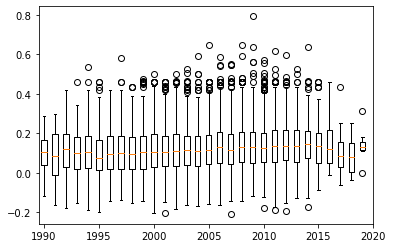

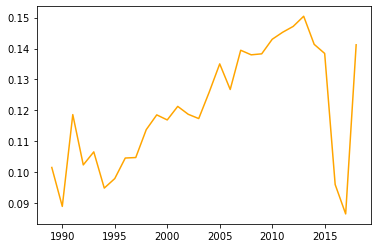

In [137]:
# x轴的值和对应的年份

plt.boxplot(data)
# 设置x轴的刻度和标签
x_ticks = range(1, len(data)+6 , 5)  # 每5个数据集标注一个刻度
x_labels = [str(year) for year in range(1990, 1990 + len(data) +1, 5)]  # 每5年一个标签
print(x_ticks,x_labels)
plt.xticks(x_ticks, x_labels)
plt.savefig("CN box.png",transparent  = True)

plt.figure()
x = list(range(1, 31))
years = list(range(1990, 2026))
plt.xticks(range(1, 41, 5), [str(year) for year in years[::5]],)
plt.plot([np.mean(item) for item in data],color = 'orange')
plt.savefig("CN mean.png",transparent  = True)

In [139]:
df_CN_mean = pd.DataFrame()
df_CN_mean['year'] = np.arange(1990,2020)
df_CN_mean['mean'] = [np.mean(item) for item in data]

In [141]:
df_CN_mean.to_csv("df_CN_mean.csv")

In [142]:
data = []
for year in range(1990,2020):
    df_US_year = df_US[df_US['公司成立年份']==year]
    df_US_year['Average Similarity'] = df_US_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))
    data.append([float(item) for item in list(df_US_year['Average Similarity'])])


tensor(0.2251)
tensor(0.1219)
tensor(0.1073)
tensor(0.2055)
tensor(-0.0161)
tensor(0.1812)
tensor(0.2939)
tensor(0.1174)
tensor(0.1844)
tensor(-0.0698)
tensor(0.0775)
tensor(0.3525)
tensor(-0.0651)
tensor(0.1937)
tensor(0.0775)
tensor(0.1812)
tensor(0.0711)
tensor(0.2952)
tensor(0.1102)
tensor(0.1073)
tensor(0.2636)
tensor(0.0866)
tensor(0.3250)
tensor(0.3182)
tensor(0.3244)
tensor(0.0807)
tensor(0.1283)
tensor(0.1585)
tensor(0.2144)
tensor(0.0377)
tensor(0.1166)
tensor(0.0892)
tensor(0.2371)
tensor(0.0469)
tensor(-0.0109)
tensor(0.2708)
tensor(0.0077)
tensor(0.0525)
tensor(0.1958)
tensor(0.2106)
tensor(0.0558)
error
tensor(-0.0206)
tensor(0.0919)
tensor(0.1855)
tensor(0.1239)
tensor(0.2096)
tensor(-0.0357)
tensor(0.1202)
tensor(0.0342)
tensor(0.0626)
tensor(-0.0280)
tensor(0.0757)
tensor(0.0843)
tensor(0.0266)
tensor(0.2126)
tensor(0.1678)
tensor(0.1157)
tensor(0.2189)
tensor(0.1597)
tensor(0.0626)
tensor(0.2104)
tensor(0.1713)


<ipython-input-142-3e89b00d6925>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_year['Average Similarity'] = df_US_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.2315)
tensor(0.0413)
tensor(0.1584)
tensor(0.1938)
tensor(0.0197)
tensor(0.2609)
tensor(0.1520)
tensor(0.2075)
tensor(0.0267)
tensor(0.0668)
tensor(0.1699)
tensor(-0.0666)
tensor(0.2253)
tensor(0.0052)
tensor(0.0725)
tensor(-0.0670)
tensor(0.0055)
tensor(0.3366)
tensor(0.0005)
tensor(0.0082)
tensor(0.1960)
tensor(0.1337)
tensor(0.1310)
tensor(0.1639)
tensor(0.1107)
tensor(0.0761)
tensor(0.0465)
tensor(0.1950)
tensor(0.3644)
tensor(0.1615)
tensor(0.1713)
tensor(0.1837)
tensor(0.0958)
tensor(0.2242)
tensor(0.1187)
tensor(0.3037)
tensor(0.2096)
tensor(0.0744)
tensor(0.0057)
tensor(0.2289)
tensor(0.1590)
tensor(0.4594)
tensor(-0.0031)
tensor(0.2151)
tensor(0.1316)
tensor(0.0751)
tensor(-0.1094)
tensor(0.1324)
tensor(0.1439)
tensor(0.2454)
tensor(0.0485)
tensor(0.1908)
tensor(0.2259)
tensor(0.1713)
tensor(0.2959)
tensor(0.2020)
tensor(-0.0292)
tensor(-0.0267)
tensor(0.0799)
tensor(0.1964)
tensor(0.0162)
tensor(0.1265)
tensor(0.2890)
tensor(0.2806)
tensor(0.2759)
tensor(0.1851)
tens

<ipython-input-142-3e89b00d6925>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_year['Average Similarity'] = df_US_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.0114)
tensor(0.0500)
tensor(0.1081)
tensor(0.1632)
tensor(0.1324)
tensor(0.0816)
tensor(0.0432)
tensor(0.2681)
tensor(0.2051)
tensor(0.1204)
tensor(0.1572)
tensor(0.1662)
tensor(0.1039)
tensor(0.2885)
tensor(-0.0760)
tensor(0.3703)
tensor(0.0625)
tensor(0.1801)
tensor(0.0760)
tensor(0.2785)
tensor(0.0339)
tensor(0.2102)
tensor(0.2162)
tensor(0.1157)
tensor(0.1614)
tensor(0.2340)
tensor(0.1132)
tensor(0.2052)
tensor(0.1898)
tensor(0.0737)
tensor(0.1157)
tensor(0.0160)
tensor(0.2184)
tensor(0.2216)
tensor(0.2142)
tensor(0.1635)
tensor(0.1415)
tensor(0.2378)
tensor(0.2638)
tensor(0.2052)
tensor(0.1627)
tensor(0.2516)
tensor(0.2260)
tensor(0.3722)
tensor(0.1548)
tensor(0.2437)
tensor(0.1141)
tensor(0.0839)
tensor(0.0436)
tensor(0.2270)
tensor(-0.0125)
tensor(0.0927)
tensor(0.4529)
tensor(0.4024)
tensor(0.0287)
tensor(0.1665)
tensor(0.1164)
tensor(0.0330)
tensor(0.0303)
tensor(0.0080)
tensor(0.2379)
tensor(0.0954)
tensor(0.0973)
tensor(0.0712)
tensor(0.1162)
tensor(0.2809)
tensor(0

<ipython-input-142-3e89b00d6925>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_year['Average Similarity'] = df_US_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1830)
tensor(0.2722)
tensor(0.1657)
tensor(0.1234)
tensor(0.0807)
tensor(0.1263)
tensor(0.2052)
tensor(0.0821)
tensor(0.2172)
tensor(0.0522)
tensor(0.3126)
tensor(0.1765)
tensor(0.1447)
tensor(0.1945)
tensor(0.1951)
tensor(0.1028)
tensor(0.2639)
tensor(0.3472)
tensor(0.2391)
tensor(0.1851)
tensor(0.1804)
tensor(0.0591)
tensor(0.1073)
tensor(0.1968)
tensor(0.2426)
tensor(0.0887)
tensor(0.0734)
tensor(0.1091)
tensor(0.0551)
tensor(0.1910)
tensor(0.1913)
tensor(0.0404)
tensor(0.1533)
tensor(0.1118)
tensor(0.2133)
tensor(0.0595)
tensor(0.0626)
tensor(-0.0772)
tensor(0.0825)
tensor(0.2638)
tensor(0.0330)
tensor(0.2582)
tensor(0.0214)
tensor(0.3133)
tensor(0.1208)
tensor(0.2049)
tensor(0.0827)
tensor(0.0381)
tensor(0.0845)
tensor(0.3283)
tensor(0.1091)
tensor(0.2231)
tensor(0.0651)
tensor(0.2177)
tensor(0.0712)
tensor(0.0063)
tensor(0.1041)
tensor(0.1005)
tensor(0.1640)
tensor(-0.0814)
tensor(0.2071)
tensor(0.2254)
tensor(-0.0121)
tensor(0.1848)
tensor(0.1818)
tensor(0.0577)
tensor(

<ipython-input-142-3e89b00d6925>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_year['Average Similarity'] = df_US_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.0476)
tensor(0.2615)
tensor(0.1566)
tensor(0.2308)
tensor(0.3618)
tensor(0.3217)
tensor(0.1116)
tensor(-0.0626)
tensor(0.1457)
tensor(0.2263)
tensor(0.2735)
tensor(0.2270)
tensor(0.0163)
tensor(0.1770)
tensor(0.1932)
tensor(0.1793)
tensor(0.2351)
tensor(0.1836)
tensor(0.1217)
tensor(0.2056)
tensor(0.1713)
tensor(0.2773)
tensor(0.2124)
tensor(0.0630)
tensor(0.1267)
tensor(0.1572)
tensor(0.2688)
tensor(0.1634)
tensor(0.1675)
tensor(0.1435)
tensor(0.2033)
tensor(0.0807)
tensor(0.1268)
tensor(0.1044)
tensor(0.0951)
tensor(0.1772)
tensor(0.2553)
tensor(0.1491)
tensor(0.1829)
tensor(0.0452)
tensor(0.1090)
tensor(0.2710)
tensor(0.0744)
tensor(0.1469)
tensor(0.1942)
tensor(0.1975)
tensor(0.2035)
tensor(0.1171)
tensor(0.2257)
tensor(0.2107)
tensor(0.1692)
tensor(0.2333)
tensor(-0.0036)
tensor(0.0852)
tensor(0.1158)
tensor(0.2495)
tensor(0.4487)
tensor(-0.0284)
tensor(0.1519)
tensor(0.3090)
tensor(-0.0929)
tensor(0.2799)
tensor(0.1201)
tensor(0.1292)
tensor(0.1878)
tensor(0.0986)
tensor

<ipython-input-142-3e89b00d6925>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_year['Average Similarity'] = df_US_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1562)
tensor(0.2674)
tensor(0.0749)
tensor(-0.0575)
tensor(0.1944)
tensor(0.2106)
tensor(0.1504)
tensor(0.1277)
tensor(0.0768)
tensor(0.1921)
tensor(0.0394)
tensor(0.2447)
tensor(-0.1206)
tensor(0.2423)
tensor(0.2704)
tensor(0.1275)
tensor(0.2312)
tensor(0.3587)
tensor(0.0836)
tensor(0.2573)
tensor(0.1706)
tensor(0.1968)
tensor(0.0807)
tensor(0.0782)
tensor(0.0505)
tensor(0.2082)
tensor(0.0375)
tensor(0.1099)
tensor(0.2897)
tensor(-0.0573)
tensor(-0.0101)
tensor(-0.0432)
tensor(0.3000)
tensor(0.0140)
tensor(0.0733)
tensor(0.1666)
tensor(0.1490)
tensor(0.3380)
tensor(0.1181)
tensor(0.1024)
tensor(-0.0318)
tensor(0.2249)
tensor(0.0861)
tensor(0.1139)
tensor(0.2222)
tensor(0.1750)
tensor(-0.0429)
tensor(0.1264)
tensor(0.2082)
tensor(0.0556)
tensor(0.1282)
tensor(0.1220)
tensor(0.0204)
tensor(0.3825)
tensor(0.0938)
tensor(0.0326)
tensor(0.2713)
tensor(0.0977)
error
tensor(0.2072)
tensor(-0.0176)
tensor(0.1207)
tensor(-0.0939)
tensor(0.1810)
tensor(0.1487)
tensor(0.0815)
tensor(0.2

<ipython-input-142-3e89b00d6925>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_year['Average Similarity'] = df_US_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1654)
tensor(0.1870)
tensor(0.0807)
tensor(0.2061)
tensor(0.1752)
tensor(0.1829)
tensor(0.1028)
error
tensor(0.1917)
tensor(0.1203)
tensor(0.2106)
tensor(0.0182)
tensor(0.2855)
tensor(0.1965)
tensor(0.2052)
tensor(0.1433)
tensor(0.1604)
tensor(0.2485)
tensor(0.0547)
tensor(0.1984)
tensor(0.1433)
tensor(0.2239)
tensor(0.1917)
tensor(0.1495)
tensor(0.0736)
tensor(0.0126)
tensor(0.2454)
tensor(-0.0157)
tensor(0.1616)
tensor(0.2831)
tensor(0.1981)
tensor(0.0011)
tensor(0.1674)
tensor(0.0488)
tensor(-0.0536)
tensor(0.0274)
tensor(-0.0149)
tensor(-0.0153)
tensor(0.1907)
tensor(0.1772)
tensor(0.2079)
tensor(0.1580)
tensor(0.1060)
tensor(0.3925)
tensor(0.2997)
tensor(0.2052)
tensor(0.2045)
tensor(0.0215)
tensor(0.1073)
tensor(-0.0346)
tensor(0.0528)
tensor(0.2065)
tensor(0.1772)
tensor(0.2205)
tensor(0.1364)
tensor(0.0807)
tensor(0.2761)
tensor(0.0330)
tensor(0.1365)
tensor(-0.0396)
tensor(0.3356)
tensor(0.4602)
tensor(0.2657)
tensor(0.0678)
tensor(0.1733)
tensor(0.1322)
tensor(-0.067

<ipython-input-142-3e89b00d6925>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_year['Average Similarity'] = df_US_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.0631)
tensor(0.1587)
tensor(0.3242)
tensor(0.1480)
tensor(0.1470)
tensor(0.2196)
tensor(0.0450)
tensor(0.2286)
tensor(0.1716)
tensor(0.1758)
tensor(0.1609)
tensor(0.1927)
tensor(0.2223)
tensor(0.2071)
tensor(0.0076)
tensor(0.1979)
tensor(0.2579)
tensor(0.1699)
tensor(0.2725)
tensor(0.1753)
tensor(0.1962)
tensor(0.1083)
tensor(0.0218)
tensor(0.2112)
tensor(0.1448)
tensor(0.1292)
tensor(0.0498)
tensor(0.1455)
tensor(0.1804)
tensor(0.1278)
tensor(0.0142)
tensor(0.2457)
tensor(0.1798)
tensor(0.0284)
tensor(0.1268)
tensor(-0.0376)
tensor(0.2436)
tensor(-0.0374)
tensor(-0.0065)
tensor(0.2344)
tensor(0.2099)
tensor(0.1736)
tensor(0.2099)
tensor(0.1003)
tensor(0.0264)
tensor(0.2125)
tensor(0.0426)
tensor(0.1517)
tensor(0.0807)
tensor(0.0330)
tensor(0.2179)
tensor(0.0555)
tensor(0.0822)
tensor(0.1354)
tensor(0.1738)
tensor(0.0473)
tensor(0.1784)
tensor(0.1950)
tensor(0.2625)
tensor(0.0520)
tensor(0.1810)
tensor(0.2492)
tensor(0.1749)
tensor(0.1417)
tensor(0.1757)
tensor(0.2594)
tensor(

<ipython-input-142-3e89b00d6925>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_year['Average Similarity'] = df_US_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.2845)
tensor(0.2319)
tensor(0.0807)
tensor(0.1015)
tensor(0.1563)
tensor(0.2106)
tensor(0.1192)
tensor(0.0418)
tensor(0.1930)
tensor(0.2633)
tensor(0.0862)
tensor(0.1286)
tensor(0.3088)
tensor(0.5631)
tensor(0.2960)
tensor(0.3292)
tensor(0.0701)
tensor(0.3305)
tensor(0.2404)
tensor(0.2187)
tensor(0.2584)
tensor(0.1292)
tensor(0.1917)
tensor(0.2052)
tensor(0.0986)
tensor(0.2827)
tensor(0.0918)
tensor(0.1503)
tensor(0.2654)
tensor(0.0518)
tensor(0.0280)
tensor(0.1951)
tensor(0.2027)
tensor(0.1945)
tensor(0.1562)
tensor(0.1748)
tensor(0.1363)
tensor(0.1240)
tensor(0.1966)
tensor(0.0810)
tensor(0.1852)
tensor(0.0599)
tensor(0.1678)
tensor(0.0359)
tensor(0.2273)
tensor(0.0153)
tensor(0.1348)
tensor(0.1549)
tensor(-0.0511)
tensor(0.3856)
tensor(0.2483)
tensor(0.0674)
tensor(0.0884)
tensor(0.0371)
tensor(0.0394)
tensor(0.2826)
tensor(0.2822)
tensor(0.0699)
tensor(0.1352)
tensor(0.1740)
tensor(0.0737)
tensor(0.1630)
tensor(0.1939)
tensor(0.0970)
tensor(0.2167)
tensor(0.0296)
tensor(0.

<ipython-input-142-3e89b00d6925>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_year['Average Similarity'] = df_US_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(-0.0020)
tensor(0.0825)
tensor(0.2052)
tensor(0.2052)
tensor(0.2338)
tensor(0.2858)
tensor(0.1652)
tensor(0.2338)
tensor(0.1333)
tensor(0.0807)
tensor(0.3254)
tensor(0.2052)
tensor(0.0271)
tensor(0.1517)
tensor(0.1829)
tensor(0.1418)
tensor(0.1530)
tensor(-0.1456)
tensor(0.2219)
tensor(0.2088)
tensor(0.1807)
tensor(0.0501)
tensor(0.1837)
tensor(0.1826)
tensor(0.1880)
tensor(0.0356)
tensor(-0.0326)
tensor(0.4691)
tensor(0.0592)
tensor(0.3183)
tensor(0.2374)
tensor(0.2341)
tensor(-0.0448)
tensor(0.1832)
tensor(0.0760)
tensor(0.1102)
tensor(0.0479)
tensor(0.2024)
tensor(0.0930)
tensor(0.1730)
tensor(0.0279)
tensor(0.1911)
tensor(0.2467)
tensor(0.1628)
tensor(0.2373)
tensor(0.1648)
tensor(0.0986)
tensor(0.2339)
tensor(0.1967)
tensor(0.2701)
tensor(0.1991)
tensor(0.1335)
tensor(0.2417)
error
tensor(0.1795)
tensor(0.2591)
tensor(0.1320)
tensor(0.1394)
tensor(0.3225)
tensor(0.2406)
tensor(0.0500)
tensor(0.2163)
tensor(0.2527)
tensor(0.2084)
tensor(0.3638)
tensor(0.1023)
tensor(0.2054)


<ipython-input-142-3e89b00d6925>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_year['Average Similarity'] = df_US_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.0757)
tensor(0.2967)
tensor(0.2162)
tensor(0.3695)
tensor(0.1917)
tensor(0.3348)
tensor(0.1158)
tensor(0.2052)
tensor(0.2828)
tensor(0.1433)
tensor(0.1433)
tensor(0.1917)
tensor(0.1917)
tensor(0.1614)
tensor(0.2894)
tensor(0.3618)
tensor(0.2468)
tensor(0.2416)
tensor(0.2426)
tensor(0.3190)
tensor(0.0736)
tensor(0.1888)
tensor(0.1477)
tensor(0.1917)
tensor(0.2977)
tensor(0.2596)
tensor(0.5112)
tensor(0.1477)
tensor(0.0882)
tensor(0.2615)
tensor(0.2678)
tensor(0.2589)
tensor(0.2819)
tensor(0.1157)
tensor(0.2029)
tensor(0.2162)
tensor(0.1477)
tensor(0.3241)
tensor(0.2537)
tensor(0.3030)
tensor(0.2106)
tensor(0.2106)
error
tensor(0.2106)
tensor(0.2575)
tensor(0.3029)
tensor(0.2106)
tensor(0.1433)
tensor(0.1903)
tensor(0.2106)
tensor(0.2357)
tensor(0.1433)
tensor(0.1347)
tensor(0.1917)
tensor(0.3486)
tensor(0.1917)
tensor(0.2623)
tensor(0.0954)
tensor(0.2471)
tensor(0.3542)
tensor(0.0337)
tensor(0.1572)
tensor(0.1354)
tensor(0.2905)
tensor(0.2010)
tensor(0.0100)
tensor(0.3147)
tens

<ipython-input-142-3e89b00d6925>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_year['Average Similarity'] = df_US_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.3949)
tensor(0.3238)
tensor(0.2638)
tensor(0.1917)
tensor(0.0590)
tensor(0.1084)
tensor(0.3195)
tensor(0.1477)
tensor(0.2785)
tensor(0.3190)
tensor(0.0753)
tensor(0.1570)
tensor(0.3585)
tensor(0.2613)
tensor(0.3018)
tensor(0.3315)
tensor(-0.0164)
tensor(-0.0274)
tensor(0.1901)
tensor(0.1433)
tensor(0.1783)
tensor(0.1917)
tensor(0.1510)
tensor(0.2194)
tensor(0.3519)
tensor(0.0063)
tensor(0.2784)
tensor(0.2018)
tensor(0.1019)
tensor(0.0942)
tensor(0.1009)
tensor(-0.0183)
tensor(0.1597)
tensor(-0.0339)
tensor(-0.1094)
tensor(0.1679)
tensor(0.2030)
tensor(0.1683)
tensor(0.0615)
tensor(0.1277)
tensor(-0.0292)
tensor(0.0958)
tensor(0.0387)
tensor(0.1404)
tensor(0.0351)
tensor(0.1668)
tensor(0.1301)
tensor(0.1989)
tensor(0.0252)
tensor(0.1635)
tensor(0.2004)
tensor(0.1181)
tensor(0.0908)
tensor(0.1215)
tensor(0.1457)
tensor(0.1734)
tensor(0.2211)
tensor(0.2618)
tensor(0.0534)
tensor(-0.0034)
tensor(0.1221)
tensor(0.2329)
tensor(0.2662)
tensor(-0.0121)
error
tensor(0.1611)
tensor(0.05

<ipython-input-142-3e89b00d6925>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_year['Average Similarity'] = df_US_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1167)
tensor(0.2141)
tensor(0.0330)
tensor(0.0861)
tensor(0.0211)
tensor(0.2705)
tensor(0.1917)
tensor(0.0896)
tensor(0.1734)
tensor(0.1917)
tensor(0.2438)
tensor(0.1738)
tensor(0.1917)
tensor(0.2255)
tensor(0.1433)
tensor(0.2081)
tensor(0.1917)
tensor(0.1150)
tensor(0.1354)
tensor(0.1217)
tensor(0.1555)
tensor(0.1273)
tensor(0.0364)
tensor(0.1267)
tensor(-0.0257)
tensor(-0.0106)
tensor(0.2374)
tensor(0.1211)
tensor(0.1758)
tensor(0.1977)
tensor(0.3237)
tensor(0.1439)
tensor(0.0412)
tensor(0.1922)
tensor(0.1801)
tensor(0.0383)
tensor(-0.0032)
tensor(0.2493)
tensor(-0.1232)
tensor(0.2341)
tensor(0.0664)
tensor(0.1237)
tensor(0.0673)
tensor(0.1219)
tensor(0.1848)
tensor(0.1326)
tensor(0.0059)
tensor(-0.0228)
tensor(0.2341)
tensor(0.1393)
tensor(0.0784)
tensor(0.1258)
tensor(0.3480)
tensor(0.0807)
tensor(0.1968)
tensor(0.0275)
tensor(0.3709)
tensor(0.1382)
tensor(0.2860)
tensor(0.1262)
tensor(0.1348)
tensor(0.1157)
tensor(-0.0411)
tensor(0.1490)
tensor(0.2390)
tensor(0.2980)
tens

<ipython-input-142-3e89b00d6925>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_year['Average Similarity'] = df_US_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.3505)
tensor(0.1917)
tensor(0.0807)
tensor(0.1637)
tensor(0.3117)
tensor(0.1150)
tensor(0.1253)
tensor(0.0330)
tensor(0.2713)
tensor(0.1433)
tensor(0.1496)
tensor(0.2113)
tensor(0.1717)
tensor(0.0133)
tensor(0.2717)
tensor(0.1917)
tensor(0.1809)
tensor(0.2172)
tensor(0.1205)
tensor(0.1026)
tensor(0.2048)
tensor(0.1688)
tensor(0.1392)
tensor(0.3376)
tensor(0.1919)
tensor(0.1211)
tensor(0.1680)
tensor(0.1576)
tensor(0.0240)
tensor(0.0758)
tensor(0.1353)
tensor(0.2391)
tensor(0.0426)
tensor(0.1220)
tensor(0.1145)
tensor(0.0272)
tensor(0.2200)
tensor(0.0747)
tensor(0.2505)
tensor(0.2321)
tensor(0.1713)
tensor(0.0575)
tensor(0.2052)
tensor(0.2219)
tensor(0.2344)
tensor(0.1129)
tensor(0.0807)
tensor(0.1044)
tensor(0.1253)
tensor(0.0807)
tensor(0.2331)
tensor(0.1571)
tensor(0.0631)
tensor(0.2631)
tensor(0.1713)
tensor(0.0099)
tensor(0.2040)
tensor(0.1316)
tensor(0.0598)
tensor(0.2949)
tensor(0.1942)
tensor(0.1496)
tensor(0.0159)
tensor(0.1124)
tensor(0.5195)
tensor(0.2183)
tensor(0.2

<ipython-input-142-3e89b00d6925>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_year['Average Similarity'] = df_US_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1401)
tensor(0.2771)
tensor(0.3162)
tensor(0.1477)
tensor(0.1917)
tensor(0.2052)
tensor(0.1826)
tensor(0.2930)
tensor(0.2361)
tensor(0.2541)
tensor(0.2373)
tensor(0.2401)
tensor(0.2106)
tensor(0.4049)
tensor(0.3424)
tensor(0.1218)
tensor(-0.0121)
tensor(0.1687)
tensor(0.3552)
tensor(0.2579)
tensor(0.1917)
tensor(0.1900)
tensor(0.2896)
tensor(0.0669)
tensor(0.2052)
tensor(0.2638)
tensor(0.2065)
tensor(0.2468)
tensor(0.1477)
tensor(0.1290)
tensor(0.1951)
tensor(0.2425)
error
tensor(0.0040)
tensor(0.2950)
tensor(0.1713)
tensor(0.1700)
tensor(0.3587)
error
tensor(0.1106)
tensor(0.3648)
tensor(0.1942)
tensor(0.2556)
tensor(0.1240)
tensor(-0.0689)
tensor(0.1818)
tensor(0.0296)
tensor(0.1144)
tensor(-0.0024)
tensor(0.1417)
tensor(0.1112)
tensor(0.1751)
tensor(0.1606)
tensor(0.1157)
tensor(-0.0121)
tensor(-0.0491)
tensor(0.0636)
tensor(0.1642)
tensor(0.0362)
tensor(0.1625)
tensor(0.1441)
tensor(0.0873)
tensor(0.1497)
tensor(0.2111)
tensor(0.1354)
tensor(0.2454)
tensor(0.2235)
tensor(0

<ipython-input-142-3e89b00d6925>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_year['Average Similarity'] = df_US_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.2270)
tensor(0.2812)
tensor(0.1326)
tensor(0.1687)
tensor(0.1687)
error
tensor(0.2280)
tensor(0.1118)
tensor(0.2123)
tensor(0.2538)
tensor(0.2538)
tensor(0.3190)
tensor(0.1006)
tensor(0.2638)
tensor(0.1140)
tensor(0.2926)
tensor(0.1247)
tensor(0.3191)
tensor(0.0807)
tensor(0.1917)
tensor(0.0657)
tensor(0.3967)
tensor(0.2106)
tensor(0.2082)
tensor(0.3174)
tensor(0.1687)
tensor(0.2270)
tensor(0.1433)
tensor(0.3876)
tensor(0.2972)
tensor(0.4194)
tensor(0.1248)
tensor(0.1787)
tensor(0.2396)
tensor(0.3965)
tensor(-0.0325)
tensor(-0.2088)
tensor(0.1968)
tensor(0.2357)
tensor(0.3578)
tensor(0.1713)
tensor(0.1968)
tensor(0.3029)
tensor(0.1968)
error
tensor(0.1069)
tensor(0.2042)
tensor(-0.0036)
tensor(0.2638)
tensor(0.1888)
tensor(0.2131)
tensor(0.2052)
tensor(0.1604)
tensor(0.0669)
tensor(0.1888)
tensor(0.1968)
tensor(0.2390)
tensor(-0.0401)
tensor(0.2039)
tensor(-0.0503)
tensor(0.1005)
tensor(0.1777)
tensor(0.2093)
tensor(0.0517)
tensor(0.2351)
tensor(0.2052)
tensor(0.0767)
tensor(0

<ipython-input-142-3e89b00d6925>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_year['Average Similarity'] = df_US_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.0726)
tensor(0.2270)
tensor(0.2162)
tensor(0.2039)
tensor(0.2357)
tensor(0.1094)
tensor(0.2010)
tensor(0.2451)
tensor(0.2106)
tensor(0.1812)
tensor(0.3004)
tensor(0.2369)
tensor(0.2013)
tensor(0.3355)
tensor(0.2270)
tensor(0.2270)
tensor(0.1917)
tensor(0.1866)
tensor(0.2757)
tensor(0.1786)
tensor(0.0852)
tensor(0.0973)
tensor(0.1968)
tensor(0.1678)
tensor(0.1752)
tensor(0.2106)
tensor(0.2336)
tensor(0.2648)
tensor(0.2833)
tensor(0.1917)
tensor(0.2568)
tensor(0.3952)
tensor(0.2338)
tensor(0.3644)
tensor(0.2338)
tensor(0.0081)
tensor(0.2365)
tensor(0.2037)
tensor(0.1752)
tensor(0.2106)
tensor(0.2730)
tensor(0.2867)
tensor(0.1903)
tensor(-0.0429)
tensor(0.2270)
tensor(0.2848)
tensor(0.2245)
tensor(0.2158)
tensor(0.2383)
tensor(0.1917)
tensor(0.1216)
tensor(0.1498)
tensor(0.3621)
tensor(0.1604)
tensor(0.1752)
tensor(0.1824)
tensor(0.3667)
tensor(0.2106)
tensor(0.1917)
tensor(0.1701)
tensor(0.1312)
tensor(0.2752)
tensor(0.2270)
tensor(0.2162)
tensor(0.2366)
tensor(0.2270)
tensor(0.

<ipython-input-142-3e89b00d6925>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_year['Average Similarity'] = df_US_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1150)
tensor(0.2215)
tensor(0.3592)
tensor(0.2651)
tensor(0.3586)
tensor(0.2882)
tensor(0.3026)
tensor(0.2283)
tensor(0.2724)
tensor(0.1433)
tensor(0.2094)
tensor(0.1824)
tensor(0.0984)
tensor(0.1433)
tensor(0.1411)
tensor(0.1433)
tensor(0.3699)
tensor(0.2270)
tensor(0.1613)
tensor(0.1917)
tensor(0.2094)
tensor(0.2661)
tensor(0.3672)
tensor(0.1778)
tensor(0.2613)
tensor(0.1917)
tensor(0.1418)
tensor(0.2369)
tensor(0.1956)
tensor(0.1958)
tensor(0.3063)
tensor(0.2396)
tensor(0.3045)
tensor(0.2259)
tensor(0.2338)
tensor(0.2314)
tensor(0.1433)
tensor(0.2270)
error
tensor(0.1917)
tensor(0.2774)
tensor(0.1416)
tensor(0.1974)
tensor(0.1974)
tensor(0.2181)
tensor(0.2270)
tensor(0.3509)
tensor(0.2181)
tensor(0.2651)
tensor(0.2052)
tensor(0.3364)
tensor(0.1917)
tensor(0.1593)
tensor(0.2515)
tensor(0.2826)
tensor(0.1917)
tensor(0.2181)
tensor(0.1917)
tensor(0.1824)
tensor(0.2276)
tensor(0.2942)
tensor(0.2745)
tensor(0.2551)
tensor(0.2826)
tensor(0.2873)
tensor(0.2396)
tensor(0.1480)
tens

<ipython-input-142-3e89b00d6925>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_year['Average Similarity'] = df_US_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.2048)
tensor(0.3019)
tensor(0.2932)
tensor(0.2811)
tensor(0.2270)
tensor(0.1713)
tensor(0.2707)
tensor(0.2608)
tensor(0.1917)
tensor(0.1820)
tensor(0.2141)
error
tensor(0.2270)
tensor(0.2706)
tensor(0.2974)
tensor(0.0807)
tensor(0.0986)
tensor(0.0802)
tensor(0.2020)
tensor(0.1102)
tensor(0.1135)
tensor(0.0807)
tensor(0.1680)
tensor(0.1650)
tensor(0.1366)
tensor(0.1297)
tensor(0.2502)
tensor(0.1480)
tensor(0.2842)
tensor(0.2957)
tensor(0.3334)
tensor(0.2609)
tensor(0.2270)
tensor(0.1917)
tensor(0.1713)
tensor(0.2670)
tensor(0.1872)
tensor(0.2388)
tensor(0.2270)
error
tensor(0.1826)
tensor(0.1917)
tensor(0.2974)
tensor(0.3354)
tensor(0.2338)
tensor(0.2270)
tensor(0.3027)
tensor(0.2707)
tensor(0.1824)
tensor(0.2700)
tensor(0.0701)
tensor(0.1917)
tensor(0.2910)
tensor(0.1917)
tensor(0.0472)
tensor(0.2270)
tensor(0.1116)
tensor(0.1917)
tensor(0.2270)
tensor(0.2270)
tensor(0.1958)
tensor(0.2270)
tensor(0.3803)
tensor(0.2270)
tensor(0.2270)
tensor(0.1958)
tensor(0.2052)
tensor(0.1917

<ipython-input-142-3e89b00d6925>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_year['Average Similarity'] = df_US_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.2515)
tensor(0.2314)
tensor(0.2124)
tensor(0.1776)
tensor(0.2314)
tensor(0.2338)
tensor(0.3297)
tensor(0.2619)
tensor(0.4252)
tensor(0.2712)
tensor(0.2270)
tensor(0.1016)
tensor(0.2052)
tensor(0.1059)
tensor(0.2263)
tensor(0.3677)
tensor(0.2270)
tensor(0.2909)
tensor(0.1807)
tensor(0.2052)
tensor(0.1651)
tensor(0.2052)
tensor(0.2635)
tensor(0.2474)
tensor(0.2270)
tensor(0.2052)
tensor(0.3406)
tensor(0.1917)
tensor(0.1917)
tensor(0.2933)
tensor(0.2052)
tensor(0.2246)
tensor(0.1917)
tensor(0.2270)
tensor(0.2661)
tensor(0.2052)
tensor(0.2364)
tensor(0.2437)
tensor(0.1951)
tensor(0.1713)
tensor(0.1824)
tensor(0.2150)
tensor(0.2925)
tensor(0.2106)
tensor(0.1372)
tensor(0.1917)
tensor(0.2052)
tensor(0.2052)
error
tensor(0.1379)
tensor(0.3750)
tensor(0.2006)
tensor(0.1824)
tensor(0.1917)
tensor(0.2270)
tensor(0.2191)
tensor(0.3119)
tensor(0.2211)
tensor(0.2598)
tensor(0.2290)
tensor(0.2630)
tensor(0.1917)
tensor(0.2806)
tensor(0.2338)
tensor(0.2081)
tensor(0.2052)
tensor(0.1413)
tens

<ipython-input-142-3e89b00d6925>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_year['Average Similarity'] = df_US_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.2006)
tensor(0.2052)
tensor(0.2655)
tensor(0.1917)
tensor(0.2015)
tensor(0.2338)
tensor(0.1917)
tensor(0.2181)
tensor(0.2013)
tensor(0.2368)
tensor(0.2052)
tensor(0.2974)
tensor(0.1842)
tensor(0.1578)
tensor(0.1924)
tensor(0.2270)
tensor(0.1917)
tensor(0.2181)
tensor(0.1786)
tensor(0.2052)
tensor(0.2435)
tensor(0.2013)
tensor(0.1713)
tensor(0.2356)
tensor(0.2094)
tensor(0.1824)
tensor(0.1752)
tensor(0.1902)
tensor(0.1917)
tensor(0.3295)
tensor(0.1824)
tensor(0.1824)
tensor(0.1824)
tensor(0.1433)
tensor(0.0367)
tensor(0.2052)
tensor(0.2781)
tensor(-0.0429)
tensor(0.2359)
tensor(0.2052)
tensor(0.1824)
tensor(0.1824)
tensor(0.2246)
tensor(0.2482)
tensor(0.2034)
tensor(0.2619)
tensor(0.2904)
tensor(0.2013)
tensor(0.1985)
tensor(0.2006)
tensor(0.1786)
tensor(0.1917)
tensor(0.1917)
tensor(0.2052)
tensor(0.1917)
tensor(0.1956)
tensor(0.1848)
tensor(0.0807)
tensor(0.2974)
tensor(0.2052)
tensor(0.1872)
tensor(0.2479)
tensor(0.2338)
tensor(0.3227)
tensor(0.2296)
tensor(0.2573)
tensor(0.

<ipython-input-142-3e89b00d6925>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_year['Average Similarity'] = df_US_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.2895)
tensor(0.1597)
tensor(0.3036)
tensor(0.2021)
tensor(0.2781)
tensor(0.2246)
tensor(0.1917)
tensor(0.1752)
tensor(0.2052)
tensor(0.2954)
tensor(0.2441)
tensor(0.2773)
tensor(0.1814)
tensor(0.1786)
tensor(0.2052)
tensor(0.3686)
tensor(0.2246)
tensor(0.2852)
tensor(-0.0274)
tensor(0.1578)
tensor(0.2605)
tensor(0.1379)
tensor(0.2352)
tensor(0.1433)
tensor(0.2351)
tensor(0.1594)
tensor(0.2052)
tensor(0.2165)
tensor(0.1900)
tensor(0.2509)
tensor(0.2052)
tensor(0.2206)
tensor(0.1871)
tensor(0.0579)
tensor(0.2052)
tensor(0.2095)
tensor(0.1824)
tensor(0.3837)
tensor(0.3485)
tensor(0.2246)
tensor(0.3424)
tensor(0.1957)
tensor(0.2648)
tensor(0.2428)
tensor(0.2422)
tensor(0.1433)
tensor(0.1713)
tensor(0.2270)
tensor(0.3945)
tensor(0.1433)
tensor(0.1917)
tensor(0.4857)
tensor(0.1578)
tensor(0.2721)
tensor(0.2270)
tensor(0.2398)
tensor(0.2052)
tensor(0.2400)
tensor(0.2965)
tensor(0.1770)
tensor(0.2270)
tensor(0.1917)
tensor(0.1917)
tensor(0.2250)
tensor(0.2052)
tensor(0.2270)
tensor(0.

<ipython-input-142-3e89b00d6925>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_year['Average Similarity'] = df_US_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.3185)
tensor(0.2756)
tensor(0.3043)
tensor(0.2338)
tensor(0.1824)
tensor(0.2338)
tensor(0.2683)
tensor(0.1990)
tensor(0.3772)
tensor(0.2052)
tensor(0.2052)
tensor(0.2426)
tensor(0.2492)
tensor(0.2270)
tensor(0.1983)
tensor(0.2052)
tensor(0.2270)
tensor(0.1570)
tensor(0.3552)
tensor(0.3125)
tensor(0.2974)
tensor(0.1699)
tensor(0.2771)
tensor(0.2661)
tensor(0.3036)
tensor(0.2651)
tensor(0.3117)
tensor(0.2677)
tensor(0.2338)
tensor(0.2270)
tensor(0.3368)
tensor(0.1687)
tensor(0.2225)
tensor(0.3479)
tensor(0.2109)
tensor(0.2094)
tensor(0.2181)
tensor(0.1647)
tensor(0.2153)
tensor(0.2240)
tensor(0.2052)
tensor(0.2608)
tensor(0.1910)
tensor(0.2270)
tensor(0.2273)
tensor(0.2646)
tensor(0.2338)
tensor(0.1824)
tensor(0.1611)
tensor(0.2880)
tensor(0.0857)
tensor(0.2351)
tensor(0.1833)
tensor(0.1433)
tensor(0.2176)
tensor(0.2094)
tensor(0.1929)
tensor(0.2270)
tensor(0.2244)
tensor(0.1917)
tensor(0.1561)
tensor(0.3954)
tensor(0.2270)
tensor(0.1604)
tensor(0.3810)
tensor(0.1391)
tensor(0.1

<ipython-input-142-3e89b00d6925>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_year['Average Similarity'] = df_US_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.2270)
tensor(0.2562)
tensor(0.1917)
tensor(0.2094)
tensor(0.2338)
tensor(0.1566)
error
tensor(0.1864)
tensor(0.2076)
tensor(0.2270)
tensor(0.1713)
tensor(0.2270)
tensor(0.2338)
tensor(0.1433)
tensor(0.2482)
tensor(0.1947)
tensor(0.2533)
tensor(0.1433)
tensor(0.2756)
tensor(0.2290)
tensor(0.1917)
tensor(0.2892)
tensor(0.2905)
tensor(0.1993)
tensor(-0.0034)
tensor(0.2052)
tensor(0.1068)
tensor(0.2052)
tensor(0.1917)
tensor(0.1433)
tensor(0.3780)
tensor(0.1854)
tensor(0.2623)
tensor(0.1786)
tensor(0.2998)
tensor(0.2562)
tensor(0.2270)
tensor(0.2338)
tensor(0.2998)
tensor(0.1917)
tensor(0.1433)
tensor(0.2270)
tensor(0.1207)
tensor(0.2445)
tensor(0.1852)
tensor(0.2756)
tensor(0.2280)
tensor(0.2075)
tensor(0.3239)
tensor(0.1904)
tensor(0.1917)
tensor(0.1910)
tensor(0.2181)
tensor(0.1824)
tensor(0.1322)
tensor(0.1917)
tensor(0.3122)
tensor(0.2986)
tensor(0.3475)
tensor(0.1917)
tensor(0.1389)
tensor(0.2549)
tensor(0.2895)
tensor(0.1965)
tensor(0.1824)
tensor(0.2270)
tensor(0.3632)
ten

<ipython-input-142-3e89b00d6925>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_year['Average Similarity'] = df_US_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1824)
tensor(0.3559)
tensor(0.2255)
tensor(0.1752)
tensor(0.1917)
tensor(0.1713)
tensor(0.2270)
tensor(0.1824)
tensor(0.2785)
tensor(0.3264)
tensor(0.1917)
tensor(0.1627)
tensor(0.2955)
tensor(0.1917)
tensor(0.2052)
tensor(0.4131)
tensor(0.1917)
error
tensor(0.3757)
tensor(0.1268)
tensor(0.3008)
tensor(0.3558)
tensor(0.2338)
tensor(0.2685)
tensor(0.3679)
tensor(0.2260)
tensor(0.1734)
tensor(0.3145)
tensor(0.3022)
tensor(0.1917)
tensor(0.1917)
tensor(0.2885)
tensor(0.2181)
tensor(0.3001)
tensor(0.0137)
tensor(0.2270)
tensor(0.1854)
tensor(0.2270)
tensor(0.2181)
tensor(0.2250)
tensor(0.1917)
tensor(0.2270)
tensor(0.2620)
tensor(0.1943)
tensor(0.2060)
tensor(0.2850)
tensor(0.1917)
tensor(0.1917)
tensor(0.2106)
tensor(0.0807)
tensor(0.2270)
tensor(0.1597)
tensor(0.1433)
tensor(0.2052)
tensor(0.2089)
tensor(0.2686)
tensor(0.1354)
tensor(0.2052)
tensor(0.1917)
tensor(0.3185)
tensor(0.2228)
tensor(0.3192)
tensor(0.2438)
tensor(0.2380)
tensor(0.0917)
tensor(0.1433)
tensor(0.2039)
tens

<ipython-input-142-3e89b00d6925>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_year['Average Similarity'] = df_US_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.2337)
tensor(0.1824)
error
tensor(0.1917)
tensor(0.2270)
tensor(0.3245)
tensor(0.2270)
tensor(0.2106)
tensor(0.2106)
tensor(0.2106)
tensor(0.2942)
tensor(0.3264)
tensor(0.2536)
tensor(0.1713)
tensor(0.2400)
tensor(0.1547)
tensor(0.2582)
tensor(0.2270)
tensor(0.1802)
tensor(0.2328)
tensor(0.1947)
tensor(0.2270)
tensor(0.2270)
tensor(0.3152)
tensor(0.1713)
tensor(0.2270)
tensor(0.2338)
tensor(0.1713)
tensor(0.2974)
tensor(0.0807)
tensor(0.2986)
tensor(0.1917)
tensor(0.1917)
tensor(0.1597)
tensor(0.2983)
tensor(0.1852)
tensor(0.1597)
tensor(0.2270)
tensor(0.2688)
tensor(0.2952)
tensor(0.2270)
tensor(0.3282)
tensor(0.3895)
tensor(0.2270)
tensor(0.2270)
tensor(0.3445)
tensor(0.2270)
tensor(0.1545)
tensor(0.2617)
tensor(0.2803)
tensor(0.2682)
tensor(0.2270)
tensor(0.1597)
tensor(0.1824)
tensor(0.3437)
tensor(0.2367)
tensor(0.1440)
tensor(0.3202)
tensor(0.1917)
tensor(0.1848)
tensor(0.2270)
tensor(0.1440)
tensor(0.0039)
tensor(0.1440)
tensor(0.3634)
tensor(0.2338)
tensor(0.1824)
tens

<ipython-input-142-3e89b00d6925>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_year['Average Similarity'] = df_US_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1917)
tensor(0.2661)
tensor(0.3298)
tensor(0.1433)
tensor(0.2338)
tensor(0.1828)
tensor(0.2181)
tensor(0.2564)
tensor(0.1597)
tensor(0.2338)
tensor(0.1639)
tensor(0.3103)
tensor(0.0856)
tensor(0.2880)
tensor(0.2270)
tensor(0.1631)
tensor(0.2907)
tensor(0.3434)
tensor(0.3631)
tensor(0.2338)
tensor(0.3119)
tensor(0.2771)
tensor(0.3139)
tensor(0.2656)
tensor(0.3094)
tensor(0.1908)
tensor(0.2854)
tensor(0.2176)
tensor(0.3166)
tensor(0.1917)
tensor(0.1917)
tensor(0.1951)
tensor(0.3981)
tensor(0.2880)
tensor(0.2270)
tensor(0.2052)
tensor(0.1826)
tensor(0.2407)
tensor(0.1917)
tensor(0.2338)
tensor(0.1943)
tensor(0.2182)
tensor(0.3130)
tensor(0.1742)
tensor(0.1373)
tensor(0.2338)
tensor(0.2052)
tensor(0.2817)
tensor(0.1713)
tensor(0.2097)
tensor(0.1713)
tensor(0.2260)
tensor(0.2862)
tensor(0.0592)
tensor(0.2661)
tensor(0.2019)
tensor(0.1752)
tensor(0.2000)
tensor(0.1597)
tensor(0.3093)
tensor(0.3754)
tensor(0.2052)
tensor(0.3130)
tensor(0.2880)
tensor(0.2338)
tensor(0.2338)
tensor(0.2

<ipython-input-142-3e89b00d6925>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_year['Average Similarity'] = df_US_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1917)
tensor(0.3104)
tensor(0.2546)
tensor(0.2052)
tensor(0.1917)
tensor(0.2396)
tensor(0.2052)
tensor(0.2255)
tensor(0.2338)
tensor(0.2106)
tensor(0.2250)
tensor(0.1917)
tensor(0.2836)
tensor(0.2436)
tensor(0.3361)
tensor(0.0864)
error
tensor(0.1433)
tensor(0.2052)
tensor(0.1917)
tensor(0.2270)
tensor(0.1752)
tensor(0.1176)
tensor(0.2722)
tensor(0.1433)
tensor(0.3517)
tensor(0.0884)
tensor(0.1917)
tensor(0.2052)
tensor(0.2817)
tensor(0.2698)
tensor(0.1588)
tensor(0.2280)
tensor(0.2733)
tensor(0.1432)
tensor(0.1951)
tensor(0.1917)
tensor(0.3012)
tensor(0.1917)
tensor(0.1939)
tensor(0.2696)
tensor(0.2008)
tensor(0.2200)
tensor(0.1858)
tensor(0.2484)
tensor(0.2020)
tensor(0.1824)
tensor(0.3781)
tensor(0.2052)
tensor(0.1713)
tensor(0.1917)
tensor(0.1848)
tensor(0.2831)
tensor(0.2942)
tensor(0.1791)
tensor(0.1288)
tensor(0.2676)
tensor(0.1713)
tensor(0.3040)
tensor(0.1824)
tensor(0.2145)
tensor(0.2302)
tensor(0.1752)
tensor(0.2280)
tensor(0.3078)
tensor(0.2902)
tensor(0.2338)
tens

<ipython-input-142-3e89b00d6925>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_year['Average Similarity'] = df_US_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1184)
tensor(0.3454)
tensor(0.4711)
tensor(0.3234)
tensor(0.2052)
tensor(0.1917)
tensor(0.1713)
tensor(0.2987)
tensor(0.3527)
tensor(0.3774)
tensor(0.1477)
tensor(0.3056)
tensor(0.1917)
tensor(0.2270)
tensor(0.2052)
tensor(0.3652)
tensor(0.2052)
tensor(0.2144)
tensor(0.1891)
tensor(0.1789)
tensor(0.1440)
tensor(0.1826)
tensor(0.2651)
tensor(0.0882)
tensor(0.1713)
tensor(0.1852)
tensor(0.1618)
tensor(0.2052)
tensor(0.2445)
tensor(0.0789)
tensor(0.3227)
tensor(0.3700)
tensor(0.1888)
tensor(0.1931)
tensor(0.1472)
tensor(0.3174)
tensor(0.3579)
tensor(0.1433)
tensor(0.2434)
tensor(0.2593)
tensor(0.3940)
tensor(0.1532)
tensor(0.3466)
tensor(0.3133)
tensor(0.2248)
tensor(0.2048)
tensor(0.4154)
tensor(0.1648)
tensor(0.2274)
tensor(0.1505)
tensor(0.1433)
tensor(0.3413)
tensor(0.2020)
tensor(0.3361)
tensor(0.2816)
tensor(0.1477)
tensor(0.2295)
tensor(0.3180)
tensor(0.2638)
tensor(0.1337)
tensor(0.1917)
tensor(0.3114)
tensor(0.1917)
tensor(0.2106)
tensor(0.2543)
tensor(0.2280)
error
tens

<ipython-input-142-3e89b00d6925>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_year['Average Similarity'] = df_US_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.4054)
tensor(0.2596)
error
tensor(0.2960)
tensor(0.2715)
tensor(0.1764)
tensor(0.1505)
tensor(0.1474)
tensor(0.2518)
tensor(0.2280)
tensor(0.2786)
tensor(0.0476)
tensor(0.1936)
tensor(0.2760)
tensor(0.1936)
tensor(0.2052)
tensor(0.2496)
tensor(0.1622)
tensor(0.3615)
tensor(0.1943)
tensor(0.2841)
tensor(0.1943)
tensor(0.2993)
tensor(0.2468)
tensor(0.1836)
tensor(0.3358)
tensor(0.2305)
tensor(0.2658)
tensor(0.2052)
tensor(0.0601)
tensor(0.1943)
tensor(0.1717)
tensor(0.2961)
tensor(0.0412)
tensor(0.2358)
tensor(0.2961)
tensor(0.2960)
tensor(0.3502)
tensor(0.1135)
tensor(0.0300)
tensor(0.2052)
tensor(0.2280)
tensor(0.2106)
tensor(0.1917)
tensor(0.1505)
tensor(0.3209)
tensor(0.1501)
tensor(0.2052)
tensor(0.3361)
tensor(0.1665)
tensor(0.1917)
tensor(0.2795)
tensor(0.2280)
tensor(0.1917)
tensor(0.1943)
tensor(0.1717)
tensor(0.2106)
tensor(0.1917)
tensor(0.2068)
tensor(0.1597)
tensor(0.2330)
tensor(0.2052)
tensor(0.1951)
tensor(0.3415)
tensor(0.2460)
tensor(0.3455)
tensor(0.2665)
tens

<ipython-input-142-3e89b00d6925>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_year['Average Similarity'] = df_US_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


range(1, 36, 5) ['1990', '1995', '2000', '2005', '2010', '2015', '2020']


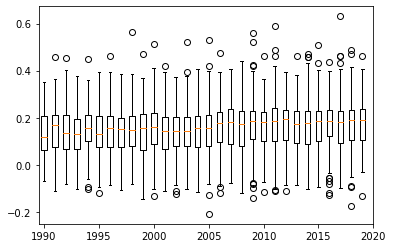

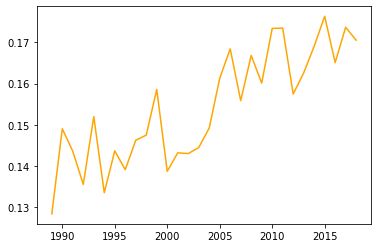

In [143]:
# x轴的值和对应的年份

plt.boxplot(data)
# 设置x轴的刻度和标签
x_ticks = range(1, len(data)+6 , 5)  # 每5个数据集标注一个刻度
x_labels = [str(year) for year in range(1990, 1990 + len(data) +1, 5)]  # 每5年一个标签
print(x_ticks,x_labels)
plt.xticks(x_ticks, x_labels)
plt.savefig("US box.png",transparent  = True)

plt.figure()
x = list(range(1, 31))
years = list(range(1990, 2026))
plt.xticks(range(1, 41, 5), [str(year) for year in years[::5]],)
plt.plot([np.mean(item) for item in data],color = 'orange')
plt.savefig("US mean.png",transparent  = True)

In [144]:
df_US_mean = pd.DataFrame()
df_US_mean['year'] = np.arange(1990,2020)
df_US_mean['mean'] = [np.mean(item) for item in data]
df_US_mean.to_csv("df_US_mean.csv")

In [164]:
data = []
for year in range(1990,2020):
    df_SG_year = df_SG[df_SG['公司成立年份']==year]
    df_SG_year['Average Similarity'] = df_SG_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))
    data.append([float(item) for item in list(df_SG_year['Average Similarity'])])


tensor(0.1456)
tensor(0.1908)
tensor(0.1999)
tensor(0.1026)
tensor(0.0556)
tensor(0.1533)


<ipython-input-164-332b59dcab98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SG_year['Average Similarity'] = df_SG_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1537)
tensor(0.1084)
tensor(0.3073)


<ipython-input-164-332b59dcab98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SG_year['Average Similarity'] = df_SG_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.2921)
tensor(0.1883)
tensor(0.1465)
tensor(0.2648)
tensor(0.2402)
tensor(0.1756)


<ipython-input-164-332b59dcab98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SG_year['Average Similarity'] = df_SG_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.2532)
tensor(0.1907)
tensor(0.2977)
tensor(0.1797)
tensor(0.1696)
tensor(0.2148)
tensor(0.0667)
tensor(0.2082)
tensor(0.2357)
tensor(0.3093)
tensor(0.1073)


<ipython-input-164-332b59dcab98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SG_year['Average Similarity'] = df_SG_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(-0.0405)
tensor(0.0859)
tensor(0.2243)
tensor(0.1073)
tensor(0.1022)
tensor(0.1970)
tensor(0.1443)
tensor(0.1969)
tensor(0.2353)
tensor(0.0515)
tensor(0.1713)
tensor(0.2271)
tensor(0.2739)
tensor(0.0791)
tensor(0.1713)
tensor(0.1443)


<ipython-input-164-332b59dcab98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SG_year['Average Similarity'] = df_SG_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.0601)
tensor(0.1981)
tensor(0.2464)
tensor(0.1058)


<ipython-input-164-332b59dcab98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SG_year['Average Similarity'] = df_SG_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1660)
tensor(0.2491)
tensor(0.1529)
tensor(0.1713)
tensor(0.0620)


<ipython-input-164-332b59dcab98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SG_year['Average Similarity'] = df_SG_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1322)
tensor(-0.0349)


<ipython-input-164-332b59dcab98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SG_year['Average Similarity'] = df_SG_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.2930)
tensor(0.1850)
tensor(0.0807)
tensor(0.2396)
tensor(0.0363)
tensor(0.0217)
tensor(0.0716)
tensor(0.2595)
tensor(0.1954)
tensor(-0.0289)
tensor(0.0859)
tensor(0.2333)


<ipython-input-164-332b59dcab98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SG_year['Average Similarity'] = df_SG_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1281)
tensor(0.2399)
tensor(0.2143)
tensor(0.0859)
tensor(0.1677)
tensor(0.2790)
tensor(0.2176)
tensor(0.3932)
tensor(0.2585)
tensor(0.1802)
tensor(0.1568)
tensor(0.0879)
tensor(0.2256)
tensor(0.1342)
tensor(0.1598)
tensor(0.1303)
tensor(0.1354)
tensor(0.1745)
tensor(0.1083)
tensor(0.0885)
tensor(0.2833)
tensor(0.1404)
tensor(0.2380)
tensor(0.1443)


<ipython-input-164-332b59dcab98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SG_year['Average Similarity'] = df_SG_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.0905)
tensor(0.1136)
tensor(0.2114)
tensor(-0.0017)
tensor(0.1739)
tensor(0.0718)
tensor(0.2286)
tensor(0.1364)
tensor(0.0806)
tensor(0.1951)
tensor(0.1505)
tensor(0.2638)
tensor(0.1164)
tensor(0.1073)
tensor(0.1310)
tensor(0.1094)
tensor(-0.1005)


<ipython-input-164-332b59dcab98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SG_year['Average Similarity'] = df_SG_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1976)
tensor(0.1104)
tensor(0.1852)
tensor(0.0807)
tensor(0.0994)
tensor(0.0859)
tensor(0.0106)
tensor(-0.0010)
tensor(0.1529)
tensor(0.1910)
tensor(0.1771)


<ipython-input-164-332b59dcab98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SG_year['Average Similarity'] = df_SG_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1345)
tensor(0.1855)
tensor(0.1655)
tensor(0.2569)
tensor(0.2332)
tensor(0.0126)
tensor(0.2185)
tensor(0.1443)
tensor(0.2601)
tensor(0.1077)
tensor(0.2311)


<ipython-input-164-332b59dcab98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SG_year['Average Similarity'] = df_SG_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1350)
tensor(0.1529)
tensor(0.2717)
tensor(0.2298)
tensor(0.1073)
tensor(0.2329)
tensor(0.0807)
tensor(0.0926)
tensor(0.1713)
tensor(0.2018)
tensor(0.1735)
tensor(0.1298)
tensor(0.1910)
tensor(0.0323)
tensor(0.0605)
tensor(0.0299)
tensor(0.1183)
tensor(0.1607)


<ipython-input-164-332b59dcab98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SG_year['Average Similarity'] = df_SG_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1100)
tensor(0.1968)
tensor(0.1168)
tensor(0.2556)
tensor(-0.0318)
tensor(0.1476)
tensor(0.1217)
tensor(0.1443)
tensor(0.0492)
tensor(0.0338)
tensor(0.1604)
tensor(0.0254)
tensor(-0.0063)
tensor(0.0045)
tensor(0.0807)
tensor(0.1411)
tensor(0.1397)
tensor(0.0443)
tensor(0.0821)
tensor(0.1442)
tensor(0.1373)
tensor(0.1443)
tensor(0.1376)
tensor(0.1211)
tensor(0.0341)
tensor(0.1910)
tensor(0.2200)
tensor(0.1603)
tensor(0.1557)
tensor(0.1850)
tensor(0.1750)
tensor(0.1854)


<ipython-input-164-332b59dcab98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SG_year['Average Similarity'] = df_SG_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.0986)
tensor(0.2673)
tensor(0.0743)
tensor(-0.0389)
tensor(0.1073)
tensor(0.2267)
tensor(0.2783)
tensor(0.1900)
tensor(-0.0163)
tensor(-0.0151)
tensor(-0.0201)
tensor(0.1789)
tensor(0.1202)
tensor(0.2167)
tensor(0.1443)
tensor(0.1910)
tensor(0.1708)
tensor(0.0339)
tensor(0.2178)
tensor(0.2441)
tensor(0.2442)
tensor(0.1824)


<ipython-input-164-332b59dcab98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SG_year['Average Similarity'] = df_SG_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(-0.0363)
tensor(0.1826)
tensor(0.1632)
tensor(0.0657)
tensor(0.2222)
tensor(0.1781)
tensor(0.1910)
tensor(0.2619)
tensor(-0.0757)
tensor(0.1792)
tensor(0.1198)
tensor(0.1535)
tensor(0.0756)
tensor(0.2391)
tensor(0.1852)
tensor(0.1544)
tensor(0.1910)
tensor(0.2087)


<ipython-input-164-332b59dcab98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SG_year['Average Similarity'] = df_SG_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.0006)
tensor(0.0274)
tensor(0.1695)
tensor(0.1084)
tensor(0.3797)
tensor(0.2101)
tensor(0.0893)
tensor(0.1814)
tensor(0.1162)
tensor(0.3040)
tensor(0.1791)
tensor(0.1713)
tensor(0.2778)
tensor(0.1660)
tensor(0.1576)
tensor(0.1668)
tensor(0.0132)


<ipython-input-164-332b59dcab98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SG_year['Average Similarity'] = df_SG_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1059)
tensor(0.2468)
tensor(0.1516)
tensor(-0.0304)
tensor(0.1713)
tensor(0.0759)
tensor(0.0807)
tensor(0.0652)
tensor(0.0419)
tensor(0.2591)
tensor(0.2487)
tensor(0.1331)
tensor(0.1283)
tensor(0.1238)
tensor(0.1431)
tensor(0.2127)
tensor(0.0222)


<ipython-input-164-332b59dcab98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SG_year['Average Similarity'] = df_SG_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.0753)
tensor(0.1713)
tensor(0.2403)
tensor(0.1469)
tensor(0.0605)
tensor(0.1580)
tensor(0.0807)
tensor(0.0538)
tensor(0.1576)
tensor(0.1910)


<ipython-input-164-332b59dcab98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SG_year['Average Similarity'] = df_SG_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1775)
tensor(0.1713)
tensor(0.1239)
tensor(-0.0680)
tensor(0.0558)
tensor(0.1321)
tensor(0.0203)
tensor(0.2846)
tensor(0.0694)
tensor(0.1310)
tensor(0.1744)
tensor(0.2368)
tensor(0.0787)
tensor(0.0704)


<ipython-input-164-332b59dcab98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SG_year['Average Similarity'] = df_SG_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.0698)
tensor(0.2260)
tensor(0.1713)
tensor(0.1566)
tensor(0.1182)
tensor(0.2308)
tensor(0.1852)
tensor(0.1910)
tensor(0.2308)
tensor(0.0549)
tensor(0.1713)
tensor(0.1531)
tensor(0.1913)
tensor(0.0291)
tensor(0.1443)
tensor(0.1702)
tensor(0.2396)


<ipython-input-164-332b59dcab98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SG_year['Average Similarity'] = df_SG_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1843)
tensor(-0.0184)
tensor(0.1513)
tensor(0.2737)
tensor(0.2231)
tensor(0.0807)
tensor(0.2487)
tensor(0.1760)
tensor(0.1149)
tensor(0.1191)
tensor(0.3495)
tensor(0.1480)
tensor(0.0723)
tensor(-0.0440)
tensor(0.0723)
tensor(0.1664)
tensor(0.1092)
tensor(0.2128)
tensor(0.2403)


<ipython-input-164-332b59dcab98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SG_year['Average Similarity'] = df_SG_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.2065)
tensor(0.2560)
tensor(0.2627)
tensor(0.1143)
tensor(0.1254)
tensor(0.1056)
tensor(0.1650)
tensor(0.2095)
tensor(0.1506)
tensor(0.1247)
tensor(0.1740)
tensor(0.1826)
tensor(0.1469)
tensor(0.1851)
tensor(0.4295)
tensor(0.1889)
tensor(0.2334)
tensor(0.2220)
tensor(0.2332)
tensor(0.1247)
tensor(0.2970)
tensor(0.0277)
tensor(0.1344)
tensor(0.0890)
tensor(0.0840)


<ipython-input-164-332b59dcab98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SG_year['Average Similarity'] = df_SG_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1227)
tensor(-0.0562)
tensor(0.1544)
tensor(0.1546)
tensor(0.2487)
tensor(0.1543)
tensor(0.0058)
tensor(0.1373)
tensor(0.0932)
tensor(0.0807)
tensor(0.3237)
tensor(0.2213)
tensor(0.1553)
tensor(0.1486)
tensor(0.0607)
tensor(0.3289)


<ipython-input-164-332b59dcab98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SG_year['Average Similarity'] = df_SG_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1909)
tensor(0.2967)
tensor(0.2853)
tensor(0.0444)
tensor(0.1534)
tensor(0.1711)
tensor(0.1748)
error
tensor(0.1910)
tensor(0.1468)
tensor(0.1935)
tensor(0.0256)


<ipython-input-164-332b59dcab98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SG_year['Average Similarity'] = df_SG_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.2553)
tensor(0.0637)
tensor(0.1728)
tensor(0.2271)
tensor(0.0807)
tensor(0.2600)
tensor(0.1220)
tensor(0.2618)
tensor(0.0703)
tensor(0.1229)
tensor(0.1597)


<ipython-input-164-332b59dcab98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SG_year['Average Similarity'] = df_SG_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.2659)
tensor(0.1363)
tensor(0.1245)
tensor(0.2055)
tensor(0.2292)
tensor(0.2620)
tensor(0.1157)
tensor(0.2083)
tensor(0.1878)
tensor(0.0044)
tensor(0.0418)
tensor(0.2104)
tensor(0.1784)
tensor(0.0216)
tensor(0.2838)
tensor(0.0577)


<ipython-input-164-332b59dcab98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SG_year['Average Similarity'] = df_SG_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.2332)
tensor(0.1045)
tensor(0.1826)
tensor(0.2832)
tensor(0.2967)
tensor(0.4080)
tensor(0.2479)
tensor(0.0759)
tensor(0.1623)
tensor(0.2051)
tensor(0.2332)
tensor(0.2839)
tensor(-0.0475)


<ipython-input-164-332b59dcab98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SG_year['Average Similarity'] = df_SG_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1163)
tensor(0.2336)
tensor(0.2267)
tensor(0.2533)


<ipython-input-164-332b59dcab98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SG_year['Average Similarity'] = df_SG_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


range(1, 36, 5) ['1990', '1995', '2000', '2005', '2010', '2015', '2020']


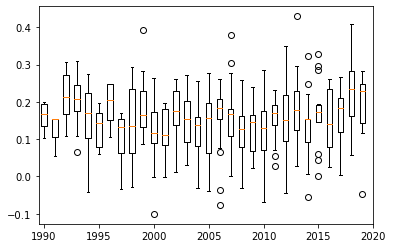

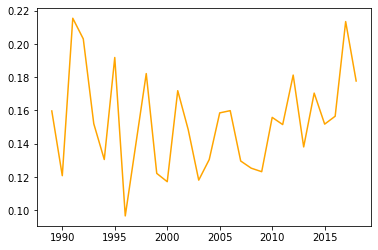

In [165]:
# x轴的值和对应的年份

plt.boxplot(data)
# 设置x轴的刻度和标签
x_ticks = range(1, len(data)+6 , 5)  # 每5个数据集标注一个刻度
x_labels = [str(year) for year in range(1990, 1990 + len(data) +1, 5)]  # 每5年一个标签
print(x_ticks,x_labels)
plt.xticks(x_ticks, x_labels)
plt.savefig("SG box.png",transparent  = True)

plt.figure()
x = list(range(1, 31))
years = list(range(1990, 2026))
plt.xticks(range(1, 41, 5), [str(year) for year in years[::5]],)
plt.plot([np.mean(item) for item in data],color = 'orange')
plt.savefig("SG mean.png",transparent  = True)

In [166]:
df_SG_mean = pd.DataFrame()
df_SG_mean['year'] = np.arange(1990,2020)
df_SG_mean['mean'] = [np.mean(item) for item in data]
df_SG_mean.to_csv("df_SG_mean.csv")

In [167]:
data = []
for year in range(1990,2020):
    df_GB_year = df_GB[df_GB['公司成立年份']==year]
    df_GB_year['Average Similarity'] = df_GB_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))
    data.append([float(item) for item in list(df_GB_year['Average Similarity'])])


tensor(0.1713)
tensor(0.1247)
tensor(0.1172)
tensor(0.1700)
tensor(0.1247)
tensor(0.0996)
tensor(0.1247)
tensor(0.2478)
tensor(0.1283)
tensor(0.0954)
tensor(0.0787)
tensor(0.2762)


<ipython-input-167-6884401b02a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GB_year['Average Similarity'] = df_GB_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1986)
tensor(0.2964)
tensor(0.3375)
tensor(0.1951)
tensor(0.1185)
tensor(0.1885)
tensor(0.0403)
tensor(0.2544)
tensor(0.2613)
tensor(0.1072)


<ipython-input-167-6884401b02a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GB_year['Average Similarity'] = df_GB_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.2578)
tensor(0.2000)
tensor(0.2361)
tensor(0.0503)
tensor(0.2281)
tensor(0.2925)
tensor(0.2052)
tensor(0.0941)
tensor(0.0418)
tensor(0.2479)
tensor(0.1482)
tensor(0.2917)
tensor(0.0625)


<ipython-input-167-6884401b02a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GB_year['Average Similarity'] = df_GB_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.2792)
tensor(-0.0464)
tensor(0.2694)
tensor(-0.0393)
tensor(0.1247)
tensor(0.2354)
tensor(0.0936)
tensor(0.1513)
tensor(0.2052)
tensor(0.0625)
tensor(0.1304)
tensor(0.1687)
tensor(0.1511)


<ipython-input-167-6884401b02a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GB_year['Average Similarity'] = df_GB_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.2485)
tensor(0.1337)
tensor(0.1267)
tensor(0.2219)
tensor(0.2048)
tensor(0.2465)
tensor(0.1846)
tensor(0.1247)
tensor(0.1247)
tensor(0.2052)
tensor(0.1591)
tensor(0.2593)
tensor(0.3336)
tensor(0.2052)
tensor(0.2856)
tensor(0.2150)
tensor(0.2372)
tensor(0.0747)
tensor(0.0716)
tensor(0.1677)
tensor(0.1202)
tensor(0.3059)
tensor(0.3072)
tensor(0.0267)
tensor(0.1001)
tensor(0.2227)
tensor(0.2058)
tensor(0.1454)


<ipython-input-167-6884401b02a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GB_year['Average Similarity'] = df_GB_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.2106)
tensor(0.1590)
tensor(0.2289)
tensor(0.1550)
tensor(0.1029)
tensor(0.0597)
tensor(0.2338)
tensor(0.2253)
tensor(0.0682)
tensor(0.0927)
tensor(0.2052)
tensor(0.1267)
tensor(0.1850)
tensor(0.1381)
tensor(0.1473)
tensor(0.2231)
tensor(0.0625)
tensor(0.2052)
tensor(0.2151)
tensor(0.0831)
tensor(0.2351)
tensor(0.1881)
tensor(0.1879)


<ipython-input-167-6884401b02a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GB_year['Average Similarity'] = df_GB_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.0215)
tensor(0.1073)
tensor(0.1719)
tensor(0.1757)
tensor(0.1713)
tensor(-0.1004)
tensor(0.1247)
tensor(0.1790)
tensor(0.1735)
tensor(0.0641)
tensor(0.2394)
tensor(0.0248)
tensor(0.0882)
tensor(0.2735)
tensor(0.4514)
tensor(0.0042)
tensor(0.1073)
tensor(0.0999)
tensor(0.0268)
tensor(-0.0737)
tensor(0.2230)
tensor(0.2849)


<ipython-input-167-6884401b02a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GB_year['Average Similarity'] = df_GB_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1965)
tensor(0.0716)
tensor(0.2292)
tensor(0.2106)
tensor(0.0822)
tensor(0.1371)
tensor(0.1550)
tensor(0.2755)
tensor(0.2086)
tensor(0.0028)
tensor(0.1887)
tensor(0.1541)
tensor(0.1440)
tensor(0.2008)
tensor(0.1460)
error
tensor(0.0807)
tensor(0.1852)
tensor(-0.0031)
tensor(0.2489)
tensor(0.1490)
tensor(0.1238)
tensor(0.1756)
tensor(0.0910)
tensor(-0.0054)
tensor(0.1496)
tensor(0.2276)


<ipython-input-167-6884401b02a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GB_year['Average Similarity'] = df_GB_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.2679)
tensor(0.2326)
tensor(0.3145)
tensor(0.1938)
tensor(0.0807)
tensor(0.3128)
tensor(0.1713)
tensor(0.2785)
tensor(0.1689)
tensor(0.3278)
tensor(0.1780)
tensor(0.4379)
tensor(0.1238)
tensor(0.2417)
tensor(0.1683)
tensor(0.3007)
tensor(0.1597)
tensor(0.2052)
tensor(0.0523)


<ipython-input-167-6884401b02a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GB_year['Average Similarity'] = df_GB_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1754)
tensor(0.2352)
tensor(0.1952)
tensor(0.0419)
tensor(0.2246)
tensor(0.0692)
tensor(0.1498)
tensor(0.2289)
tensor(0.2025)
tensor(0.0797)
tensor(0.0212)
tensor(0.1870)
tensor(0.0068)
tensor(0.3096)
tensor(0.1379)
tensor(0.1724)
tensor(0.0753)
tensor(0.0973)
tensor(0.0807)
tensor(0.2071)
tensor(0.0949)
tensor(0.1973)
tensor(0.2150)
tensor(0.1073)
tensor(-0.0846)
tensor(0.1386)
tensor(0.1622)
tensor(0.1392)
tensor(0.2369)
tensor(0.1387)
tensor(0.2116)
tensor(0.1122)


<ipython-input-167-6884401b02a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GB_year['Average Similarity'] = df_GB_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1496)
tensor(0.1469)
tensor(0.0337)
tensor(0.0067)
tensor(0.0807)
tensor(0.1148)
tensor(0.2122)
tensor(0.1549)
tensor(0.1245)
tensor(0.1780)
tensor(0.2052)
tensor(0.1219)
tensor(-0.0319)
tensor(0.2208)
tensor(0.1247)
tensor(0.1997)
tensor(0.1280)
tensor(0.1486)
tensor(0.0539)
tensor(0.1557)
tensor(0.0743)
tensor(0.2516)
tensor(0.1354)
tensor(0.2101)
tensor(0.2646)
tensor(0.2285)
tensor(0.1826)
tensor(0.1617)
tensor(0.0692)
tensor(0.1627)
tensor(0.0201)
tensor(0.2297)
tensor(0.1862)
tensor(0.1076)
tensor(0.2943)
tensor(0.2342)
tensor(0.0289)
tensor(0.2112)
tensor(0.1272)
tensor(0.0669)
tensor(0.2408)
tensor(-0.0076)
tensor(0.0692)
tensor(0.2070)
tensor(0.2065)
tensor(0.1937)
tensor(0.2408)
tensor(0.4760)
tensor(0.1166)
tensor(0.0348)
tensor(0.1826)
tensor(0.2397)
tensor(0.1911)
tensor(0.1689)
tensor(0.1977)
tensor(0.3728)


<ipython-input-167-6884401b02a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GB_year['Average Similarity'] = df_GB_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.2267)
tensor(0.1912)
tensor(0.1601)
tensor(0.1826)
tensor(0.2368)
tensor(0.1423)
tensor(0.1836)
tensor(0.2671)
tensor(0.2013)
tensor(0.1596)
tensor(0.2947)
tensor(0.3629)
tensor(0.1409)
tensor(0.3282)
tensor(0.1161)
tensor(0.1030)
tensor(0.1329)
tensor(0.1301)
tensor(0.1868)
tensor(0.2650)
tensor(0.1086)
tensor(0.2618)
tensor(0.0807)
tensor(0.2084)
tensor(0.0283)
tensor(0.1643)
tensor(0.2626)
tensor(0.2256)
tensor(0.1836)


<ipython-input-167-6884401b02a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GB_year['Average Similarity'] = df_GB_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.2403)
tensor(0.2766)
tensor(0.1802)
tensor(0.1976)
tensor(0.2614)
tensor(0.2774)
tensor(0.0966)
tensor(-0.0650)
tensor(0.2410)
tensor(0.1774)
tensor(0.1772)
tensor(0.1390)
tensor(0.1766)
tensor(0.0807)
tensor(0.1102)
tensor(0.1261)
tensor(0.1649)
tensor(0.1560)
tensor(0.1966)
tensor(0.0687)
tensor(0.1267)
tensor(0.2383)
tensor(0.0939)
tensor(0.0471)
tensor(0.2147)


<ipython-input-167-6884401b02a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GB_year['Average Similarity'] = df_GB_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1359)
tensor(0.2802)
tensor(0.1590)
tensor(0.1354)
tensor(0.1910)
tensor(0.0808)
tensor(0.0235)
tensor(0.0906)
tensor(0.3164)
tensor(0.2891)
tensor(0.2337)
tensor(0.1885)
tensor(0.2028)
tensor(0.0869)
tensor(0.4602)
tensor(0.1767)
tensor(0.1343)
tensor(0.2665)
tensor(0.0526)
tensor(0.1782)
tensor(0.2133)
tensor(0.0319)
tensor(0.2666)
tensor(0.1902)
tensor(0.1125)
tensor(0.2218)
tensor(0.1826)
tensor(0.1969)
tensor(0.1819)
tensor(0.2365)
tensor(0.2106)
tensor(0.2293)
tensor(0.3845)
tensor(0.0639)


<ipython-input-167-6884401b02a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GB_year['Average Similarity'] = df_GB_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.0844)
tensor(0.1091)
tensor(0.2003)
tensor(0.3005)
tensor(0.2052)
tensor(0.1354)
tensor(0.0752)
tensor(0.1538)
tensor(0.0507)
tensor(0.1759)
tensor(0.2052)
tensor(0.2661)
tensor(0.1063)
tensor(0.2658)
tensor(0.2596)
tensor(0.1881)
tensor(0.1286)
tensor(0.0692)
tensor(0.0258)
tensor(0.2742)
tensor(0.1838)
tensor(0.0692)
tensor(0.2020)
tensor(0.0905)
tensor(0.1316)
tensor(0.2448)
tensor(0.0696)
tensor(0.2060)
tensor(0.1490)
tensor(0.1826)
tensor(0.1247)
tensor(0.1566)
tensor(0.1224)
tensor(0.1398)
tensor(0.1121)
tensor(0.2359)
tensor(0.2078)
tensor(0.1992)
tensor(-0.0438)
tensor(0.2020)
tensor(0.1478)
tensor(0.1786)
tensor(0.1135)
tensor(0.1149)
tensor(0.0612)
tensor(0.2885)
tensor(0.1713)
tensor(0.1505)
tensor(0.0777)
tensor(0.2520)
tensor(0.1196)
tensor(0.0986)
tensor(0.2097)
tensor(0.0976)
tensor(0.1973)
tensor(0.1439)
tensor(0.1840)
tensor(0.2093)
tensor(0.0900)
tensor(0.2381)
tensor(0.1220)
tensor(0.1923)
tensor(0.1925)
tensor(0.2006)
tensor(0.0807)
tensor(0.1221)
tensor(0.

<ipython-input-167-6884401b02a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GB_year['Average Similarity'] = df_GB_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(-0.0019)
tensor(0.0946)
tensor(0.2566)
tensor(0.2641)
tensor(0.1985)
tensor(0.2332)
tensor(0.1895)
tensor(0.0297)
tensor(0.1330)
tensor(0.2970)
tensor(0.2151)
tensor(0.1342)
tensor(0.1474)
tensor(0.2660)
tensor(0.1354)
tensor(0.0587)
tensor(0.0364)
tensor(0.0445)
tensor(0.2052)
tensor(0.2853)
tensor(0.2703)
tensor(0.0597)
tensor(0.0215)
tensor(0.3821)
tensor(-0.0525)
tensor(0.1187)
tensor(0.1131)
tensor(0.2622)
tensor(0.2287)
tensor(0.1979)
tensor(0.2404)
tensor(0.1624)
tensor(0.1833)
tensor(0.1444)
tensor(0.1100)
tensor(0.1826)
tensor(0.0578)
tensor(0.2376)
tensor(-0.0660)
tensor(0.1980)
tensor(-0.0443)
tensor(0.2155)
tensor(0.2578)
tensor(0.5278)
tensor(0.1786)
tensor(0.1609)
tensor(-0.0286)
tensor(0.2827)
tensor(0.1512)
tensor(0.2360)
tensor(0.1877)
tensor(0.1615)
tensor(0.0792)
tensor(0.2784)
tensor(0.2216)
tensor(0.1544)
tensor(0.2154)
tensor(0.1772)
tensor(0.1079)
tensor(0.2237)
tensor(0.5693)
tensor(0.2911)
tensor(0.1247)
tensor(0.2878)
tensor(0.2272)
tensor(0.3216)
tenso

<ipython-input-167-6884401b02a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GB_year['Average Similarity'] = df_GB_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(-0.0270)
tensor(0.2117)
tensor(0.0350)
tensor(0.2811)
tensor(0.0787)
tensor(0.2596)
tensor(0.2628)
tensor(0.2617)
tensor(0.2403)
tensor(0.1928)
tensor(0.2253)
tensor(0.1610)
tensor(-0.0270)
tensor(0.0710)
tensor(0.1254)
tensor(0.1642)
tensor(0.1589)
tensor(0.2313)
tensor(0.2200)
tensor(0.0861)
tensor(0.1713)
tensor(0.2889)
tensor(0.0981)
tensor(0.0534)
tensor(0.1786)
tensor(0.1394)
tensor(0.1713)
tensor(0.2854)
tensor(0.0593)
tensor(0.0418)
tensor(0.1477)
tensor(0.1839)
tensor(0.0479)
tensor(0.1697)
tensor(0.1894)
tensor(0.1189)
tensor(0.0409)
tensor(0.2178)
tensor(0.1078)
tensor(0.0470)
tensor(-0.0094)
tensor(0.2331)
tensor(0.1263)
tensor(0.1789)
tensor(0.2410)
tensor(0.2556)
tensor(0.0216)
tensor(0.0519)
tensor(0.1664)
tensor(0.1757)
tensor(0.0216)
tensor(0.3292)
tensor(0.1416)
tensor(0.1290)
tensor(-0.0116)
tensor(-0.0536)
tensor(0.4598)
tensor(0.2306)
tensor(0.1771)
tensor(0.1408)
tensor(0.2003)
tensor(0.1693)
tensor(0.2326)
tensor(0.2295)
tensor(0.2484)
tensor(0.1809)
tenso

<ipython-input-167-6884401b02a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GB_year['Average Similarity'] = df_GB_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.2946)
tensor(0.1969)
tensor(0.2561)
tensor(0.4198)
tensor(0.0952)
tensor(0.0791)
tensor(0.2457)
tensor(0.1882)
tensor(0.0807)
tensor(0.2641)
tensor(0.2751)
tensor(0.2948)
tensor(0.1906)
tensor(0.0429)
tensor(0.0807)
tensor(0.2069)
tensor(0.0828)
tensor(0.1522)
tensor(0.2041)
tensor(0.0232)
tensor(0.1050)
tensor(0.2906)
tensor(0.2554)
tensor(0.1652)
tensor(0.1523)
tensor(0.2562)
tensor(0.1786)
tensor(0.2464)
tensor(0.1574)
tensor(0.0048)
tensor(0.2275)
tensor(0.0625)
tensor(0.2922)
tensor(0.1377)
tensor(-0.0051)
tensor(0.2042)
tensor(0.0419)
tensor(0.2593)
tensor(0.1972)
tensor(0.0327)
tensor(0.2052)
tensor(0.2996)
tensor(0.2432)
tensor(0.1295)
tensor(0.0389)
tensor(0.2735)
tensor(0.1864)
tensor(0.0528)
tensor(0.2387)
tensor(0.1847)
tensor(0.2471)


<ipython-input-167-6884401b02a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GB_year['Average Similarity'] = df_GB_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1842)
tensor(0.1338)
tensor(0.1826)
tensor(0.2322)
tensor(0.2278)
tensor(0.2661)
tensor(0.0653)
tensor(-0.1140)
tensor(0.3825)
tensor(0.3814)
tensor(0.0727)
tensor(0.1206)
tensor(0.1247)
tensor(0.1041)
tensor(0.0524)
tensor(-0.0270)
tensor(0.1982)
tensor(0.1713)
tensor(0.2143)
tensor(0.2002)
tensor(0.1943)


<ipython-input-167-6884401b02a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GB_year['Average Similarity'] = df_GB_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.2051)
tensor(-0.0078)
tensor(0.0807)
tensor(0.0248)
tensor(0.1783)
tensor(0.1294)
tensor(0.1255)
tensor(0.2209)
tensor(0.0928)
tensor(0.1713)
tensor(0.0442)
tensor(0.0241)
tensor(0.0538)
tensor(0.1839)
tensor(0.0807)
tensor(0.2053)


<ipython-input-167-6884401b02a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GB_year['Average Similarity'] = df_GB_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1016)
tensor(0.1977)
tensor(0.0596)
tensor(0.1712)
tensor(0.1189)
tensor(0.2169)
tensor(0.2787)
tensor(0.1956)
tensor(-0.0649)
tensor(0.2390)
tensor(0.2101)
tensor(0.2246)
tensor(0.1551)
tensor(0.1557)
tensor(0.3024)
tensor(0.2449)
tensor(0.1247)
tensor(0.0378)
tensor(0.2973)
tensor(0.2299)
tensor(0.1354)
tensor(0.1314)
tensor(0.1073)
tensor(0.1995)
tensor(0.2119)
tensor(0.1132)
tensor(0.1257)
tensor(0.2316)
tensor(0.1588)
tensor(0.2600)
tensor(0.1302)
tensor(0.2467)
tensor(0.1396)
tensor(0.0898)
tensor(0.2062)
tensor(0.2049)


<ipython-input-167-6884401b02a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GB_year['Average Similarity'] = df_GB_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1758)
tensor(0.2785)
tensor(0.0898)
tensor(0.0953)
tensor(0.2003)
tensor(0.0775)
tensor(0.2449)
tensor(0.1609)
tensor(0.1786)
tensor(0.1547)
tensor(0.1908)
tensor(0.0911)
tensor(0.1840)
tensor(0.1568)
tensor(0.2449)
tensor(0.1852)
tensor(0.0852)
tensor(0.1085)
tensor(0.1400)
tensor(0.3686)
tensor(0.3612)
tensor(0.0437)
tensor(0.1247)
tensor(0.1574)
tensor(0.2437)
tensor(0.2368)
tensor(0.2089)
tensor(0.1826)


<ipython-input-167-6884401b02a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GB_year['Average Similarity'] = df_GB_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1852)
tensor(0.1758)
tensor(0.1672)
tensor(0.2052)
tensor(0.1829)
tensor(0.2732)
tensor(0.3702)
tensor(0.0391)
tensor(0.1354)
tensor(0.1786)
tensor(0.1786)
tensor(0.2071)
tensor(0.2285)
tensor(0.1826)
tensor(0.2460)
tensor(0.0815)
tensor(0.0613)
tensor(0.2391)
tensor(0.2106)
tensor(0.0412)
tensor(0.2399)
tensor(0.2230)
tensor(-0.0270)
tensor(0.0964)
tensor(0.2433)
tensor(0.1443)
tensor(0.2003)
tensor(0.1699)
tensor(0.2618)
tensor(0.3657)
tensor(0.1883)
tensor(0.2881)


<ipython-input-167-6884401b02a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GB_year['Average Similarity'] = df_GB_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.2178)
tensor(0.1466)
tensor(0.1245)
tensor(0.2389)
tensor(0.2598)
tensor(0.1585)
tensor(0.2023)
tensor(0.0914)
tensor(0.0248)
tensor(0.1030)
tensor(0.2266)
tensor(0.1786)
tensor(0.3115)
tensor(0.0743)
tensor(0.1167)
tensor(0.1472)
tensor(0.0539)
tensor(0.1726)
tensor(0.2100)
tensor(0.1073)
tensor(0.1838)
tensor(0.2054)
tensor(0.2804)
tensor(0.2326)
tensor(0.0969)
tensor(0.1073)
tensor(0.2391)
tensor(-0.0186)
tensor(0.5369)
tensor(0.1989)
tensor(-0.0011)
tensor(0.3053)
tensor(0.1565)
tensor(0.2387)


<ipython-input-167-6884401b02a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GB_year['Average Similarity'] = df_GB_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.0612)
tensor(0.2641)
tensor(0.1836)
tensor(0.1136)
tensor(0.1403)
tensor(0.0807)
tensor(0.1463)
tensor(0.1557)
tensor(0.0433)
tensor(0.1840)
tensor(0.1910)
tensor(0.2213)
tensor(0.1354)
tensor(0.2472)
tensor(-0.1504)
tensor(0.0119)
tensor(0.2144)
tensor(0.2750)
tensor(0.0720)
tensor(-0.0653)
tensor(0.1507)
tensor(-0.0138)
tensor(-0.0482)
tensor(0.1511)
tensor(0.1713)
tensor(0.1738)
tensor(0.0041)
tensor(0.1883)
tensor(0.2197)
tensor(0.1950)
tensor(0.2507)
tensor(0.1958)
tensor(0.0789)
tensor(0.1830)
tensor(0.1731)
tensor(0.0864)
tensor(0.0812)
tensor(0.1908)
tensor(0.0385)
tensor(0.1749)
tensor(0.1929)
tensor(0.2329)
tensor(0.0359)
tensor(0.2141)
tensor(0.1895)
tensor(0.2154)
tensor(-0.0270)
tensor(0.1122)
tensor(0.1143)
tensor(-0.0297)
tensor(0.1752)
tensor(0.0140)
tensor(0.0771)
tensor(0.0353)
tensor(0.1826)
tensor(0.0296)
tensor(0.0450)
tensor(0.3325)
tensor(0.2724)
tensor(0.0047)
tensor(0.2002)


<ipython-input-167-6884401b02a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GB_year['Average Similarity'] = df_GB_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.2121)
tensor(0.1115)
tensor(0.2052)
tensor(0.2606)
tensor(0.0823)
tensor(0.1176)
tensor(0.0121)
tensor(0.1833)
tensor(0.2294)
tensor(0.2015)
tensor(0.1591)
tensor(0.1826)
tensor(0.1886)
tensor(0.0344)
tensor(0.2343)
tensor(0.1510)
tensor(0.1594)
tensor(0.0853)
tensor(0.2349)
tensor(0.1975)
tensor(0.1865)
tensor(0.2281)
tensor(0.2533)
tensor(0.1519)
tensor(0.0203)
tensor(0.1588)
tensor(0.3546)
tensor(0.1072)
tensor(0.0807)
tensor(0.1794)
tensor(0.0434)
tensor(0.2631)
tensor(0.2407)
tensor(0.1713)
tensor(0.0585)
tensor(0.1422)
tensor(0.1828)
tensor(0.1169)
tensor(0.1471)
tensor(0.2034)
tensor(0.3200)
tensor(0.1462)
tensor(0.1536)
tensor(0.0802)


<ipython-input-167-6884401b02a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GB_year['Average Similarity'] = df_GB_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.0011)
tensor(-0.0456)
tensor(0.1013)
tensor(0.0324)
tensor(0.1547)
tensor(0.2106)
tensor(0.1487)
tensor(0.1843)
tensor(0.2827)
tensor(0.1783)
tensor(0.1341)
tensor(0.2418)
tensor(0.2152)
tensor(0.1598)
tensor(0.0190)
tensor(0.2012)
tensor(0.0807)
tensor(0.1986)
tensor(0.0531)
tensor(0.2515)
tensor(0.0481)
tensor(0.1482)
tensor(0.1469)
tensor(0.1958)
tensor(-0.0063)
tensor(0.0943)
tensor(0.2052)
tensor(0.2029)
tensor(0.2596)
tensor(0.1679)
tensor(0.2072)
tensor(0.2005)
tensor(0.2226)
tensor(0.1321)
tensor(0.1635)
tensor(0.3678)
tensor(0.0991)
tensor(0.2359)
tensor(0.2203)
tensor(0.1951)
tensor(0.1758)
tensor(0.0020)
tensor(0.1790)
tensor(0.2052)
tensor(0.2435)
tensor(0.1625)
tensor(0.1122)


<ipython-input-167-6884401b02a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GB_year['Average Similarity'] = df_GB_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.1880)
tensor(0.1135)
tensor(0.2152)
tensor(0.1377)
tensor(0.1916)
tensor(0.1641)
tensor(0.2259)
tensor(0.3478)
tensor(-0.0602)
tensor(0.0248)
tensor(0.2061)
tensor(0.2875)
tensor(0.1438)
tensor(0.1829)
tensor(0.1691)
tensor(0.2086)
tensor(0.1598)
tensor(-0.0270)
tensor(0.2265)
tensor(0.1440)
tensor(0.2057)
tensor(0.1523)
tensor(0.2591)
tensor(0.0295)
tensor(0.0964)
tensor(0.1826)
tensor(0.2177)
tensor(0.2353)
tensor(0.1241)
tensor(0.1713)
tensor(-0.0738)
tensor(0.1914)
error
tensor(0.0692)
tensor(0.2619)
tensor(0.0807)
tensor(0.0084)
tensor(0.1330)
tensor(0.2161)
tensor(0.2136)
tensor(0.1233)
tensor(0.1329)
tensor(0.2371)
tensor(0.1511)
tensor(0.1686)
tensor(0.1984)
tensor(0.2052)
tensor(0.2485)


<ipython-input-167-6884401b02a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GB_year['Average Similarity'] = df_GB_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.0943)
tensor(0.1917)
tensor(0.2714)
tensor(0.2310)
tensor(0.1718)
tensor(0.1589)
tensor(0.1495)
tensor(0.1299)
tensor(0.2106)
tensor(0.0026)
tensor(0.3480)
tensor(0.2332)
tensor(0.1972)
tensor(0.1149)
tensor(0.1475)
tensor(0.2197)
tensor(0.0807)
tensor(0.0977)
tensor(0.1593)
tensor(0.2756)
error
tensor(0.2203)
tensor(0.0466)
tensor(0.0910)
tensor(0.0668)
tensor(0.2067)
tensor(0.2493)
tensor(0.1371)
tensor(0.1194)
tensor(0.2004)
tensor(0.2371)
tensor(0.0752)
tensor(0.1979)
tensor(0.1572)
tensor(0.2476)
tensor(0.1623)
tensor(0.1663)


<ipython-input-167-6884401b02a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GB_year['Average Similarity'] = df_GB_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


tensor(0.2544)
tensor(0.2422)
tensor(0.1826)
tensor(0.0418)
tensor(0.1579)
tensor(0.1488)
tensor(0.1865)
tensor(0.1979)
tensor(0.1548)
tensor(0.1544)
tensor(0.2210)
tensor(0.0259)
tensor(0.1570)
tensor(0.1826)
tensor(0.0358)
tensor(0.2201)
tensor(0.2114)
tensor(0.1975)
tensor(0.2997)
tensor(0.2415)
tensor(0.1693)
tensor(0.2203)
tensor(0.2151)
tensor(0.1677)
tensor(0.1756)
tensor(0.3967)
tensor(0.2106)
tensor(0.2629)
tensor(0.1604)
tensor(0.0492)
tensor(0.0973)
tensor(0.3244)
tensor(0.1569)
tensor(0.1181)
tensor(0.2756)
tensor(0.2309)
tensor(0.0996)


<ipython-input-167-6884401b02a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GB_year['Average Similarity'] = df_GB_year['主要产品和服务'].apply(lambda x: average_cosine_similarity(x, baseline_words))


range(1, 36, 5) ['1990', '1995', '2000', '2005', '2010', '2015', '2020']


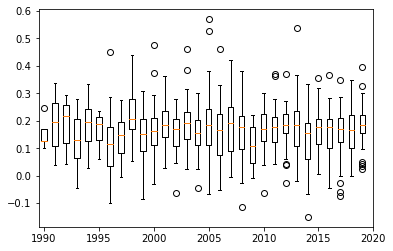

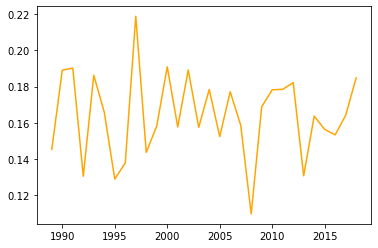

In [168]:
# x轴的值和对应的年份

plt.boxplot(data)
# 设置x轴的刻度和标签
x_ticks = range(1, len(data)+6 , 5)  # 每5个数据集标注一个刻度
x_labels = [str(year) for year in range(1990, 1990 + len(data) +1, 5)]  # 每5年一个标签
print(x_ticks,x_labels)
plt.xticks(x_ticks, x_labels)
plt.savefig("GB box.png",transparent  = True)

plt.figure()
x = list(range(1, 31))
years = list(range(1990, 2026))
plt.xticks(range(1, 41, 5), [str(year) for year in years[::5]],)
plt.plot([np.mean(item) for item in data],color = 'orange')
plt.savefig("GB mean.png",transparent  = True)

In [169]:
df_GB_mean = pd.DataFrame()
df_GB_mean['year'] = np.arange(1990,2020)
df_GB_mean['mean'] = [np.mean(item) for item in data]
df_GB_mean.to_csv("df_GB_mean.csv")

In [232]:
data[29].index(min(data[29]))

15

In [231]:
min(data[29])

0.02587023377418518

In [233]:
list(df_GB[df_GB['公司成立年份']==2019]["主要产品和服务"])[15]

'Medicinal cannabis investment services'

In [ ]:
list(df_GB[df_GB['公司成立年份']==1998][""])[13]